Basic packages are imported

In [1]:
import pandas as pd #Pandas for data loading and manipulation
import numpy as np #NumPy for calculations
import matplotlib.pyplot as plt #MatPlotLib for basic Visualization
import scipy.stats as ss #scipy.stats for statistic analysis
import seaborn as sns #Seaborn for Visualization
from scipy.io import loadmat
from google.colab import drive #google.colab to access data from a Drive directory
from scipy.optimize import curve_fit

In [2]:
drive.mount('/content/gdrive', force_remount= True) #Mounting Drive

Mounted at /content/gdrive


Each Spreadsheet are imported in the next cell in different Pandas objects

In [91]:
Caffeine = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Caffeine_batches", index_col = 0, header = 6, usecols = "A:B")

Caffeine2 = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Caffeine-2", index_col = 0, header = 7, usecols = "A:C")

Caffeine3 = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Caffeine-3", header = 7, usecols = "A:C")

Transfers = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Investigation time", index_col = 0, header = 11, usecols = "A:H")

Reclaims = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Reclaims", header = 6, usecols = "A:C")

Student = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Student", index_col=0, header = 6, usecols = "A:C")

Hospital = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Hospital", index_col=0, header = 7, usecols = "A:C")

Pareto = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Pareto", index_col=0, header = 7, usecols = "A:C")

THT = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "THT", header = 8, usecols = "A:B")

LofS = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Length of stay", header = 5, usecols = "A")


Moist = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Moisture", header = 6, usecols = "A:D")

Callcenter = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Callcenter", header = 11, usecols = "E:F")

Fertilizers = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Fertilizer", header = 6, usecols = "A:B")

Productivity = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Productivity", header = 6, usecols = "A:C")

Deps = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Departments", header = 6, usecols = "A:B")


Tea = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Tea bags", header = 7, usecols = "A:C")

CaffQuad = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Caffeine", header = 6, usecols = "A:B")

Picking = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Picking", header = 7, usecols = "A:C")

Printers = pd.read_excel('.../_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "Printers", header = 6, usecols = "A:D", index_col = 0)

## M1 - V2: Sampling

In [4]:
Sample = np.random.randint(1, 5000, size = 100) #Numpy Random Integer Generator

## M2 - V2: Descriptive Statistics

In [5]:
Caffeine.describe() #Pandas describe methos provides descriptive statistics

,Caffeine%
count,40.000000
mean,0.083175
std,0.016361
min,0.044000
25%,0.072750
50%,0.084500
75%,0.094000
max,0.118000


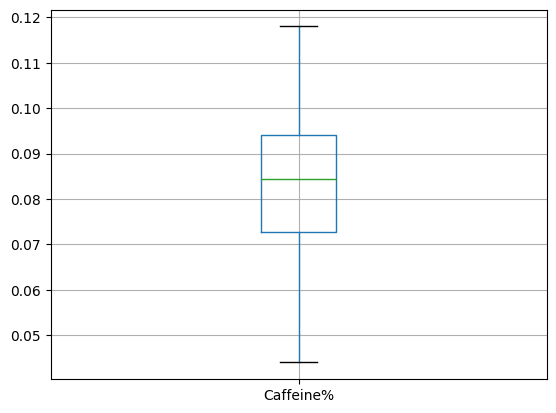

In [6]:
Caffeine.boxplot() #Pandas object has a boxplot method, but there are further alternatives that will be shown next.
plt.show()

## M2-V3: Visualizing numerical data

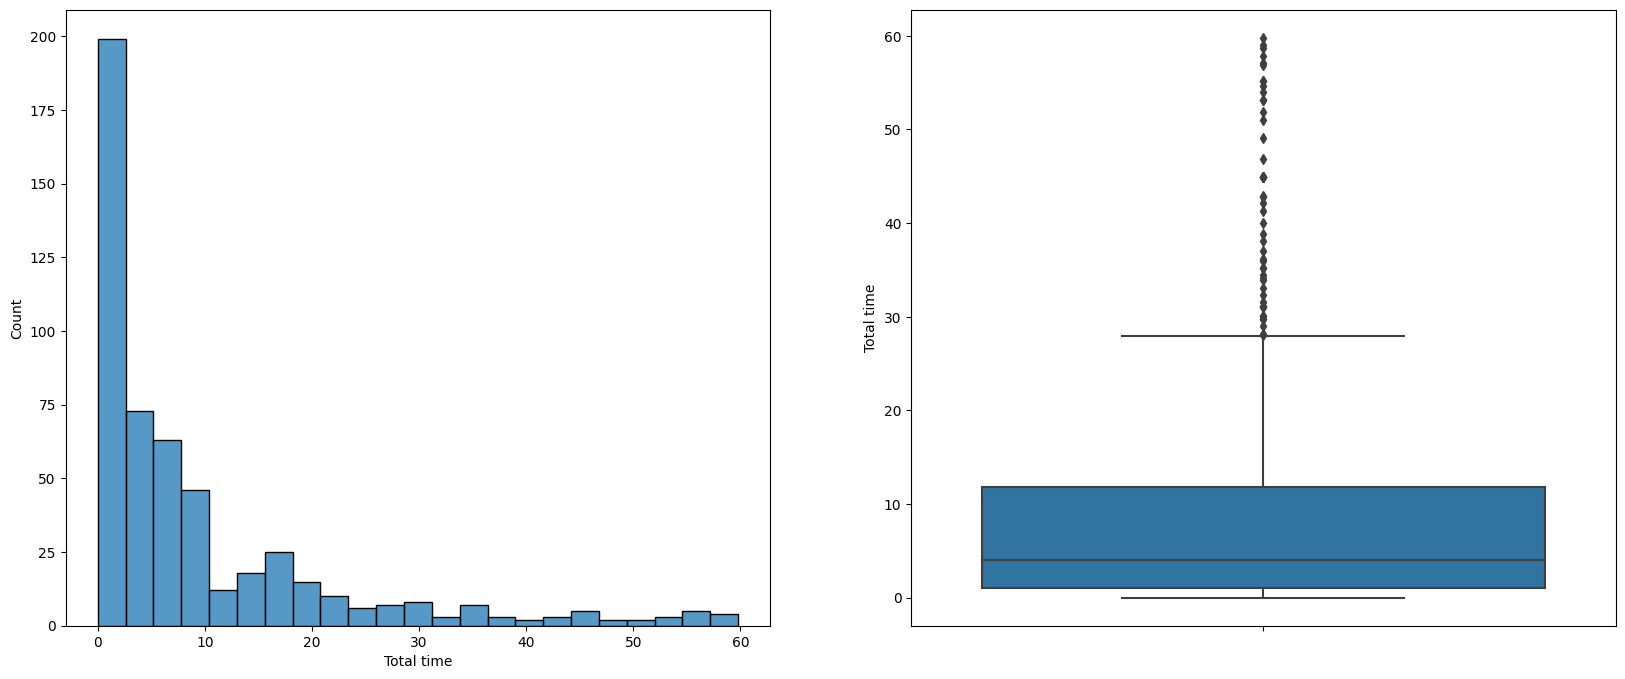

In [7]:
fig, ax = plt.subplots(1,2, figsize = (20,8))

sns.histplot(data = Transfers["Total time"], ax = ax[0]) #Histogram made with seaborn
sns.boxplot(y = Transfers["Total time"], ax = ax[1]) #Boxplot, this time made with seaborn, next to histogram

plt.show()

## M2-V4: Visualizing categorical data

In [8]:
# Unfortunately Seaborn does not have a pie chart function (although it can be done),
# so it has been done with Pandas method with seaborn style.
Count_reclaim = Reclaims["Reclaim"].value_counts()

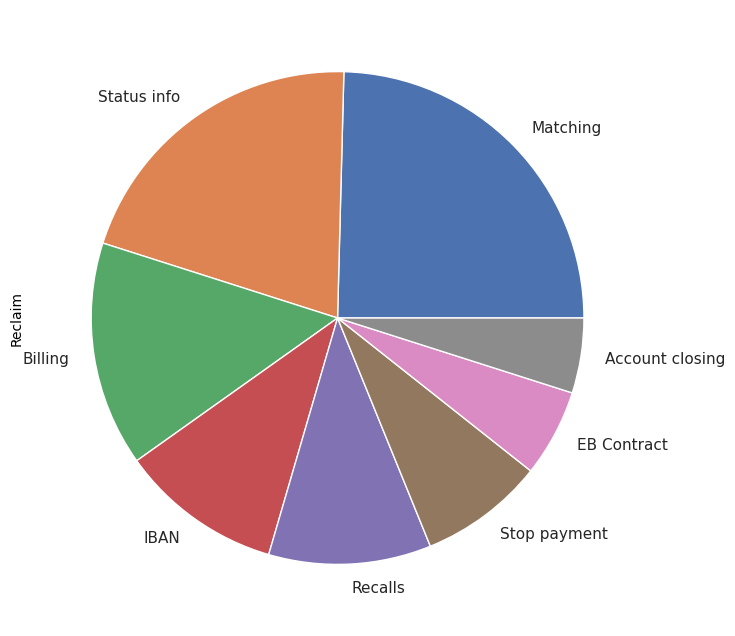

In [9]:
plt.subplots(1,1, figsize=(20,8)) # Set size of the figure
sns.set(style='white') # Set seaborn style
Count_reclaim.plot.pie() # Generate pie chart
plt.show()

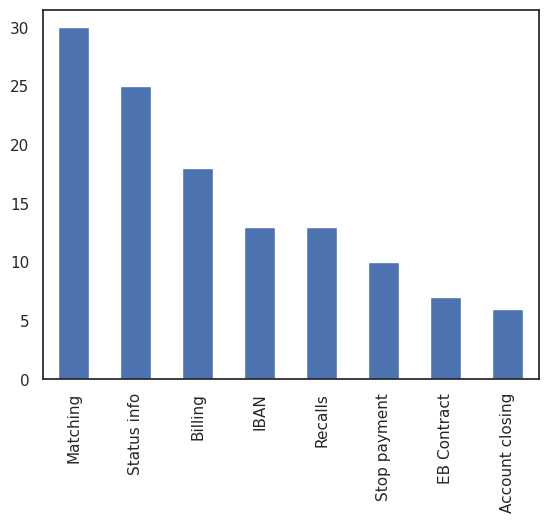

In [10]:
sns.set(style='white') #Set seaborn style
Count_reclaim.plot.bar() #Generate bar chart
plt.show()

## M2 - V5: Pareto analysis

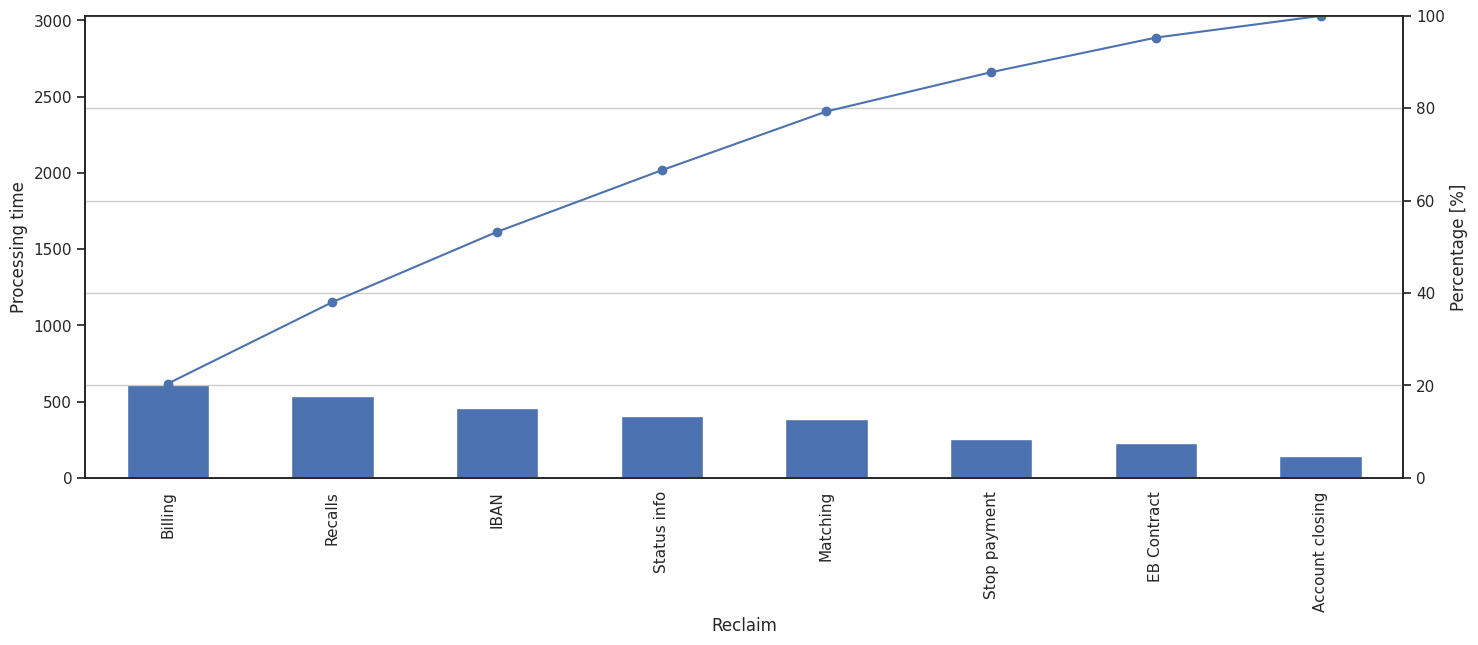

In [11]:

# Function to see Pareto chart in a Minitab-like fashion

def pareto(x, frequency = "Frequency", cause = "Cause"):
  """
  If count Pareto chart is desired, x is a Pandas Series and "frequency" and "cause" parameters are ignored.

  If a frequency Pareto chart is desired, x is a two-columns Pandas DataFrame where the left (first) columns are causes to inspect and the
  frequencies to consider are in the right (second) columns.
  Frequency and Cause parameters are the columns' labels in the x DataFrame. If labels are literally "Frequency" and "Cause",
  these word will be default.

  """

  if len(x.shape) == 1: #If there is just one columns (x is a Pandas Series), it will be assumed that a "count" Pareto chart is wanted.
    fig, axC = plt.subplots(figsize = (17,6)) #Set count axes
    S = x.value_counts().plot.bar(ax = axC) # Count of causes and barplot
    axP = axC.twinx() #Set Percentage axes
    axP.plot(x.value_counts().index,
                   100*x.value_counts().cumsum()/x.value_counts().sum()) #Scattering Accumulation (To achieve Minitab-like appearance)
    axP.scatter(x.value_counts().index,
                   100*x.value_counts().cumsum()/x.value_counts().sum()) #Lineplot Accumulation (To achieve Minitab-like appearance)
    # Set axis limits and labels
    plt.xlabel(x.name)
    axP.set_ylabel('Percent [%]')
    axC.set_ylabel('Counts')
    axC.set_ylim(0,len(x))
    axP.set_ylim(0,100)
    plt.xticks(rotation = -90, ha = "left")
    plt.grid()
    plt.show()
  else:
    if x.shape[1] > 2:
      raise Exception("Too many columns") #More than three columns will not be accepted

    if x.columns[0] != cause or x.columns[1] != frequency: #This exception ensures there will be no confusion between columns
      #x.sort_index(axis = 1, inplace = True)
      raise Exception("Wrong column labeling")

    if x.shape[1] == 2:
      x = x.loc[x[frequency].apply(lambda y: isinstance(y, int) or isinstance(y, float)),:] #Exclude possible non-numerical values.
      S = x.groupby([cause]).sum() #Sum frequencies by each cause
      S = S.sort_values(axis = 'index', by = frequency, ascending = False) #Orderin from highest to lowest according to 80/20 principle
      fig, axF = plt.subplots(figsize = (17,6)) #Set frequency axis
      B = S[frequency].cumsum()/S[frequency].sum()
      R = S[frequency][0]/B[0] # Scale axis limits to show Pareto chart in a Minitab-like fashion
      S.plot.bar(ax = axF, legend = False) #Barplot
      axP = axF.twinx() #Set percentage axis
      #Set axes limits and labeling
      axF.set_ylabel(frequency)
      axP.set_ylabel("Percentage [%]")
      axP.set_ylim(0, 100);
      axF.set_ylim(0, R);
      axP.plot(S.index, 100*B)
      axP.scatter(S.index, 100*B)
      plt.grid()
      plt.show()


pareto(Reclaims[["Reclaim", "Processing time"]], cause = "Reclaim", frequency = "Processing time")



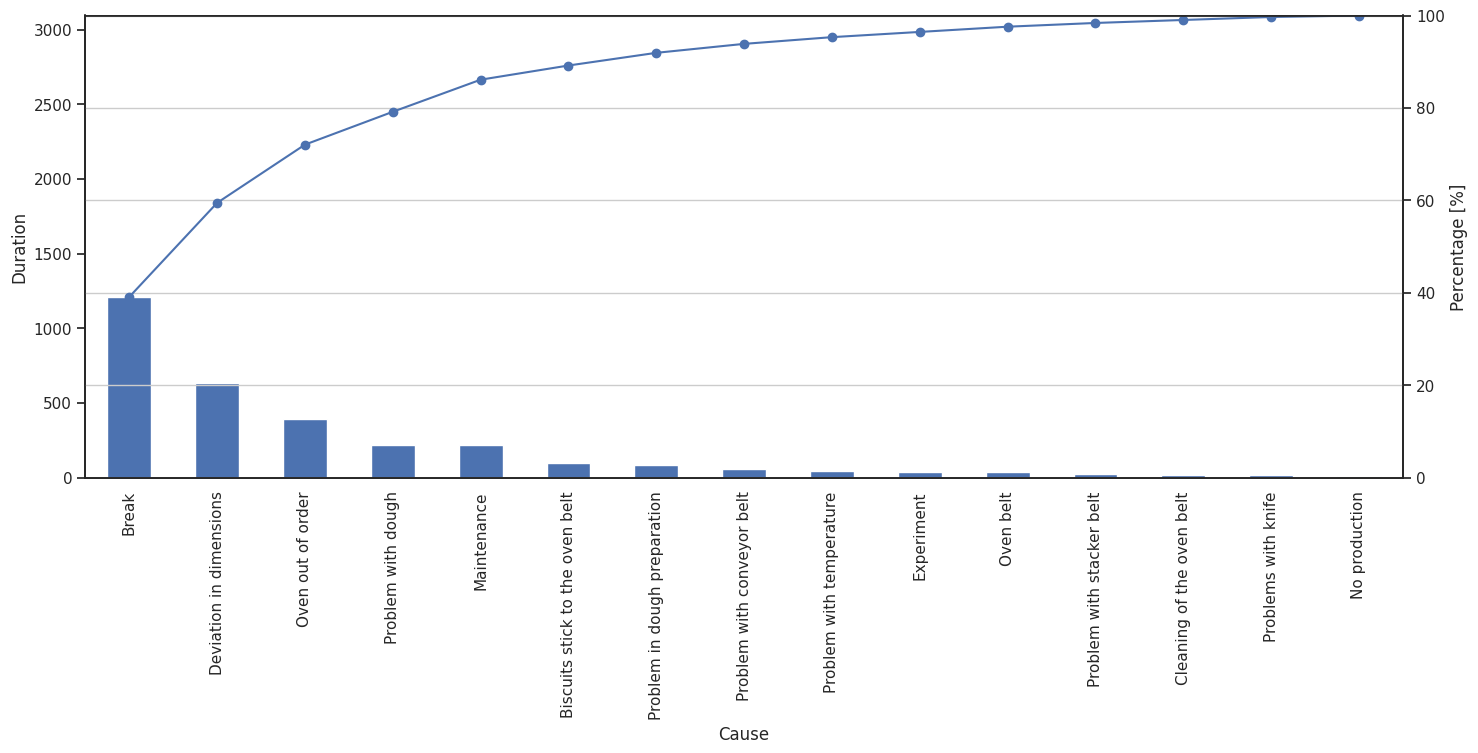

In [12]:
pareto(Pareto[["Cause", "Duration"]], cause = "Cause", frequency = "Duration")

## M2 - V6: Visualizing two variables

Numerical vs Numerical --> Scatterplot

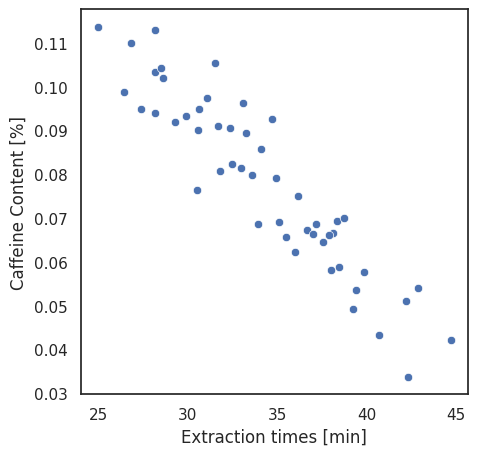

In [13]:
# Caffeine2
fig, ax = plt.subplots(figsize = (5,5)) #Set figure and axes object
sns.scatterplot(x = Caffeine2["Extraction time"], y = Caffeine2["Caffeine Content"], ax = ax) #Plotting with Seaborn
#Setting labels with units between brackets
ax.set_xlabel("Extraction times [min]")
ax.set_ylabel("Caffeine Content [%]")
plt.show()

Categorical vs Numerical --> Boxplot

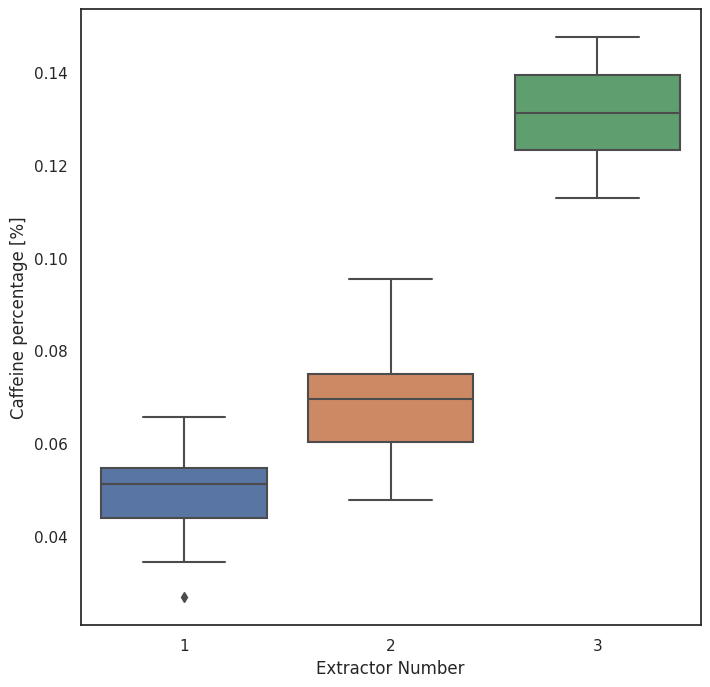

In [14]:
fig, ax = plt.subplots(figsize = (8,8)) #Set figure and axes objects
sns.boxplot(x = Caffeine3["Extractor nr."], y = Caffeine3["Caffeine%"], ax = ax) #Seaborn boxplots
#Setting more descriptive axes labels
ax.set_ylabel("Caffeine percentage [%]")
ax.set_xlabel("Extractor Number")
plt.show()

Numerical vs Categorical -> Transposed Boxplot

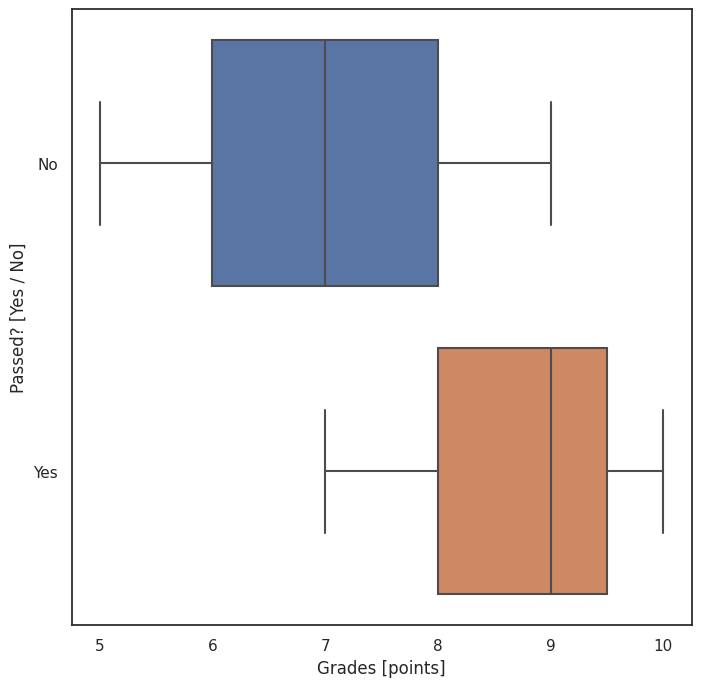

In [15]:
fig, ax = plt.subplots(figsize = (8,8)) #Set figure and axes objects
sns.boxplot(x = Student.loc[Student["Math grade"] != "*","Math grade"], y = Student["Pass?"], ax = ax) #Seaborn boxplots
#Setting more descriptive axes labels
ax.set_xlabel("Grades [points]")
ax.set_ylabel("Passed? [Yes / No]")
plt.show()

Categorical vs Categorical -> Stacked Bar Chart

In [16]:
# A cross tabulation is needed in the first time to get all the crossed frequencies
pd.crosstab(columns = Hospital.Department, index = Hospital.Specialist)

Department,A1,A4
Specialist,,
P,81,17
Q,52,15
R,78,26


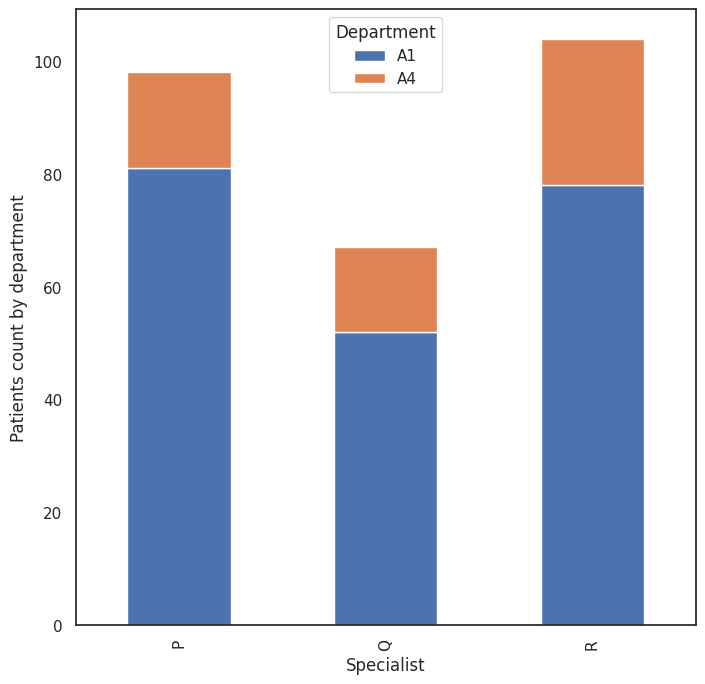

In [17]:
sns.set(style='white') #Set seaborn style
#Crossed tabulation is also a Pandas object which has a plot method where parameter can be set to generate a stacked bar chart
fig, ax = plt.subplots(figsize = (8,8)) #Set figure and axes objects
pd.crosstab(columns = Hospital.Department, index = Hospital.Specialist).plot(kind = "bar", stacked = True, ax = ax)
ax.set_xlabel("Specialist")
ax.set_ylabel("Patients count by department")
plt.show()



## M2 - V7: Exercise - Investigation time

In [18]:
#Descriptive Statistics
Transfers.describe()

,Total time,Time open,Time pending,Time closed,Number of pending iterations
count,521.000000,521.000000,521.000000,521.000000,521.000000
mean,9.422342,2.891420,3.933896,2.597025,1.282150
std,12.660866,3.076626,8.025397,7.346299,2.010321
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.040000,0.700000,0.000000,0.000000,0.000000
50%,4.070000,2.100000,0.000000,0.000000,0.000000
75%,11.850000,4.250000,4.770000,0.050000,2.000000
max,59.800000,23.390000,55.790000,50.100000,8.000000


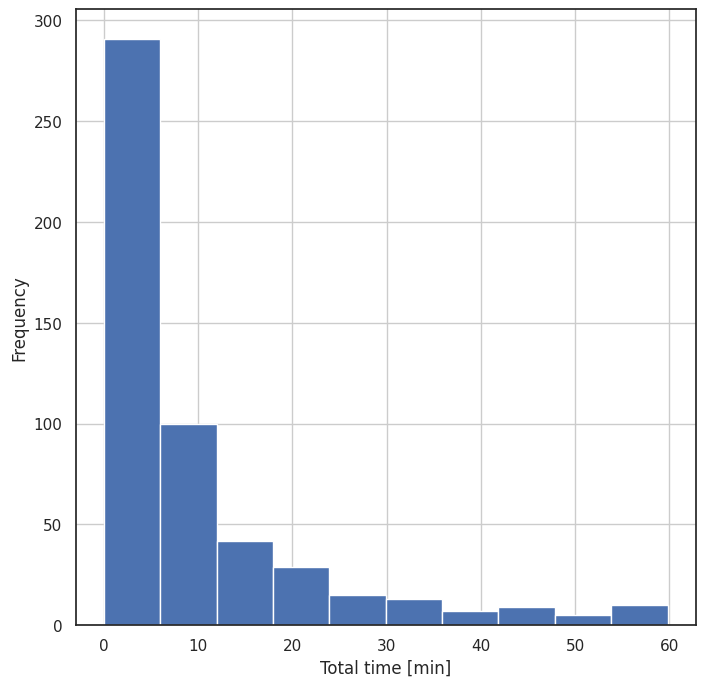

In [19]:
fig, ax = plt.subplots(figsize = (8,8))
# Histogram for the total investigation time
Transfers["Total time"].hist(ax = ax)
ax.set_xlabel("Total time [min]")
ax.set_ylabel("Frequency")
plt.show()

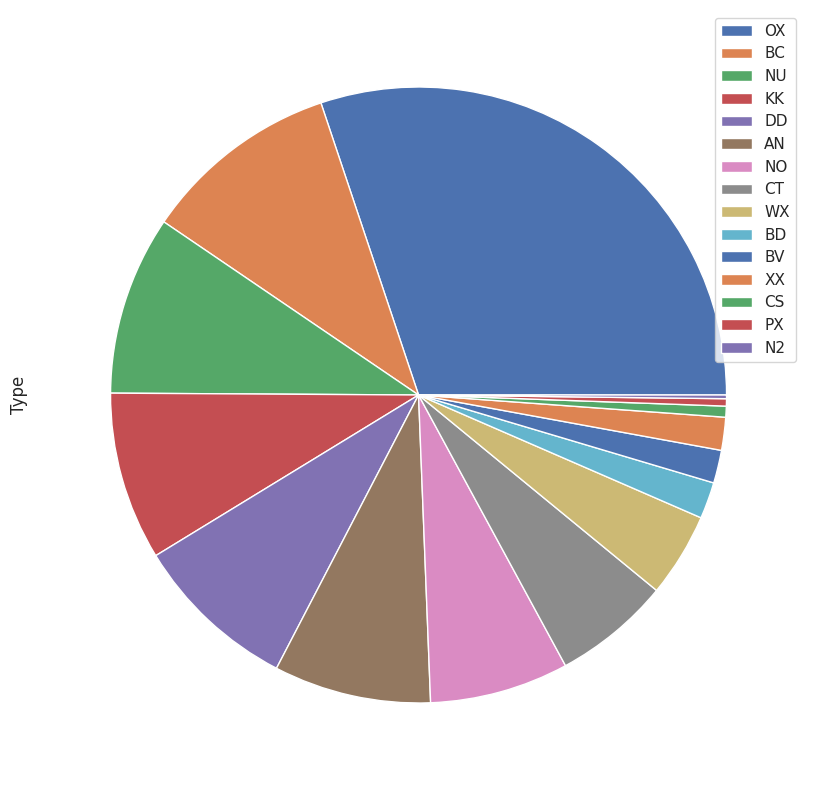

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
# Pie chart for the investigation time of each transfer type
Transfers["Type"].value_counts().plot.pie(ax = ax, legend = True, labels = None)
plt.show()

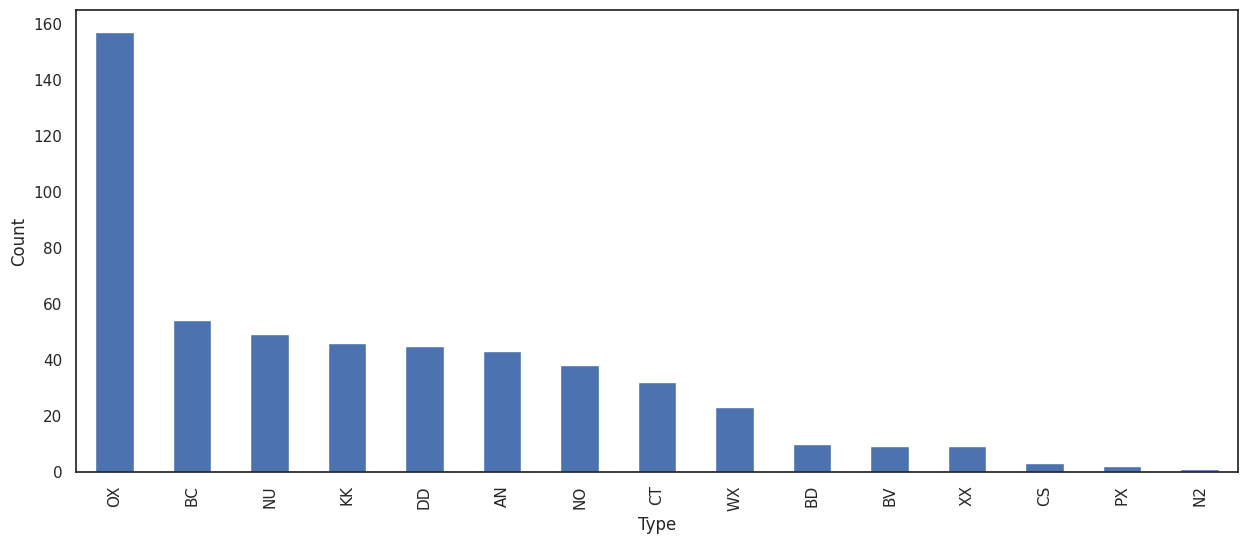

In [21]:
# Barplot
Transfers["Type"].value_counts().plot(kind = "bar", figsize = (15,6))
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
# Another way to configure the plot without setting previously an axes object
# Preferred when Seaborn is not used

## M2 - V8: Excercise - Coffee Batch

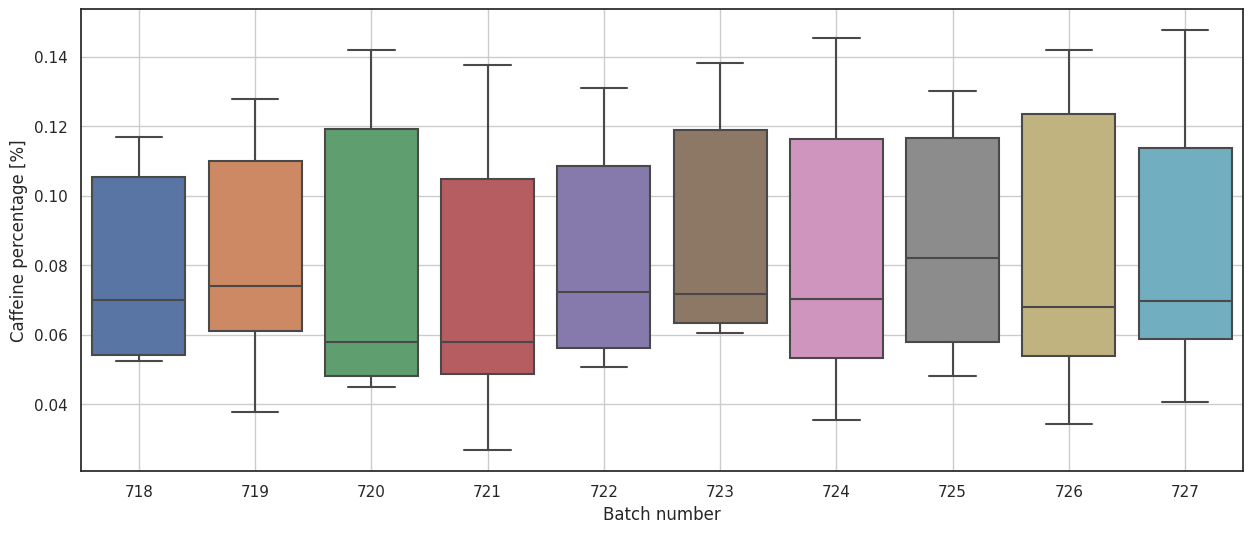

In [22]:

fig, ax = plt.subplots(figsize = (15,6))
"""
x--> Batch number --> Categorical
Y --> Caffeine percentage --> Numerical
Boxplots will be graphed with seaborn
"""
sns.boxplot(x = Caffeine3["Batch nr."], y = Caffeine3["Caffeine%"], ax = ax)
ax.set_xlabel("Batch number")
ax.set_ylabel("Caffeine percentage [%]")
plt.grid() #Sometimes a grid can be useful
plt.show()

## M3 - V2: Estimation and confidence intervals

In [23]:
Caffeine2.head()

,Caffeine Content,Extraction time
Measurement,,
1,0.065758,35.515587
2,0.058861,38.446456
3,0.033810,42.320815
4,0.089381,33.280603
5,0.067373,36.690363


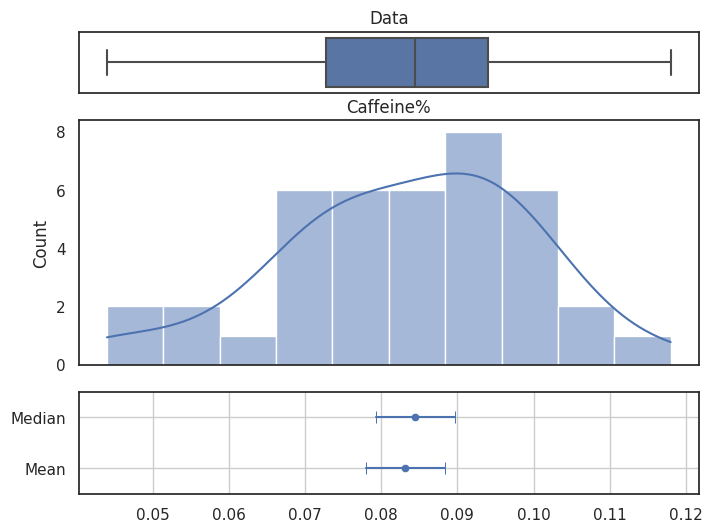

In [116]:
def boxhist(x, name = "Data"):

  """
  This function offers a Minitab-like Graphical Summary

  x: Pandas DataFrame or Series containing the data
  name: Optional parameter to identify the graphic

  """

  # Subplots are created to display graphical information
  f, (ax_box, ax_hist, ax_conf) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .60, .25)}, figsize=(8,6))
  # Histogram with kde
  h = sns.histplot(data = x, bins = 10, kde = True, ax = ax_hist)
  # Transverse boxplot
  bp = sns.boxplot(x = x, ax = ax_box).set(title = name)


  FDS = x.describe() #Pandas describe method is useful as initial information
  # Variance, Skewness and Kurtosis are calculated with scipy.stats and added to the DataFrame given by the Pandas
  # Describe method to complement statistical information as Minitab does.
  FDS.loc["Variance"] = [FDS.loc["std"]**2]
  Scipy_desc = ss.describe(x.dropna())
  FDS.loc["Skewness"] = Scipy_desc.skewness
  FDS.loc["Kurtosis"] = Scipy_desc.kurtosis

  # 95% Confidence intervals are calculated
  forMean = ss.t.interval(confidence = 0.95, df = len(x.dropna())-1,
                          loc = FDS.loc["mean"], scale = ss.sem(x.dropna()))
  forMedian = ss.t.interval(confidence = 0.95, df = len(x.dropna())-1,
                            loc = FDS.loc["50%"], scale = ss.sem(x.dropna()))
  forStd = ss.t.interval(confidence = 0.95, df = len(x.dropna())-1,
                         loc = FDS.loc["std"], scale = ss.sem(x.dropna()))

  # 95% Confidence intervals are added to the DataFrame object containing statistical information
  FDS.loc["Conf. Intr. 95% for Mean"] = [(forMean[0], forMean[1])]
  FDS.loc["Conf. Intr. 95% for Median"] = [(forMedian[0], forMedian[1])]
  FDS.loc["Conf. Intr. 95% for Std"] = [(forStd[0], forMedian[1])]

  # Plotting Confidence intervals
  xmean = np.linspace(FDS.loc["Conf. Intr. 95% for Mean"][0][0], FDS.loc["Conf. Intr. 95% for Mean"][0][1], 100)
  xmedian = np.linspace(FDS.loc["Conf. Intr. 95% for Median"][0][0], FDS.loc["Conf. Intr. 95% for Median"][0][1], 100)


  id = sns.lineplot(x = xmean, y = 0.1, ax = ax_conf, color = "b")
  id = sns.lineplot(x = xmedian, y = 0.2, ax = ax_conf, color = "b")
  id = sns.scatterplot(x = FDS.loc["Conf. Intr. 95% for Mean"][0], y = (0.1,0.1), color = "b", marker = "|", s = 80)
  id = sns.scatterplot(x = FDS.loc["mean"], y = [0.1], color = "b")
  id = sns.scatterplot(x = FDS.loc["Conf. Intr. 95% for Median"][0], y = (0.2,0.2), color = "b", marker = "|", s = 80)
  id = sns.scatterplot(x = FDS.loc["50%"], y = [0.2], color = "b")

  # Setting axes limits and lables
  id.set_yticks(np.array([0.1, 0.2]))
  id.set(ylim=(0.05, 0.25))
  id.set_yticklabels(['Mean','Median'])
  id.grid()

  plt.show()
  return FDS

A = boxhist(Caffeine["Caffeine%"])

## M3 - V3: Normal, Lognormal and Weibull distribution.

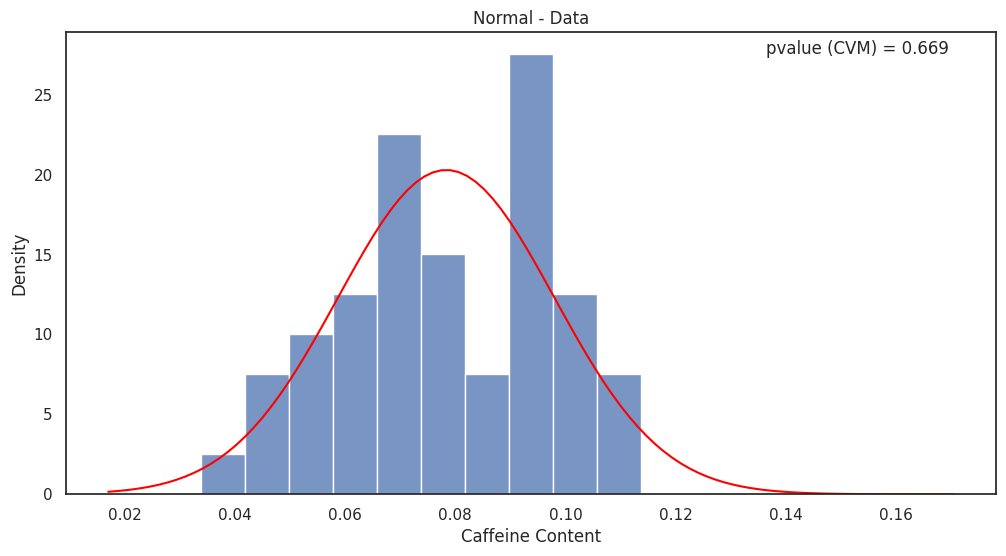

In [117]:
def distcompare(x, distr = "Normal", name = "Data"):

  """
  This function offers a Minitab-like Graphical overlap of histogram and an user selected distribution.

  x: Pandas Series containing the data
  distr: Distribution to test
  name (optional): Some word to identify the data
  """
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import scipy.stats as ss

  f, ax = plt.subplots(1,1, figsize = (12,6))
  bins = 10
  h = sns.histplot(data = x, bins = bins, ax = ax, stat = 'density').set(title = distr + " - " + name)# kde = True, ax = ax_hist)
  base = np.linspace(0.5*np.min(x),1.5*np.max(x),10*bins)
  if distr == "Normal":
    loc = np.mean(x)
    scale = np.std(x)
    params = (loc, scale)
    y = ss.norm.pdf(base, loc = loc, scale = scale)
    result = ss.cramervonmises(x, ss.norm.cdf, args = (loc,scale))
    #y = y/np.sum(y)
  if distr == "Lognormal":
    params = ss.lognorm.fit(x.dropna())
    scale = params[-1]
    loc = params[-2]
    shape = params[0]
    y = ss.lognorm.pdf(base, s = shape, loc = loc, scale = scale)
    result = ss.cramervonmises(x, ss.lognorm.cdf, args = params)
  if distr == "Exponential":
    params = ss.expon.fit(x.dropna())
    scale = params[-1]
    loc = params[-2]
    y = ss.expon.pdf(base, loc = loc, scale = scale)
    result = ss.cramervonmises(x, ss.expon.cdf, args = params)
  if distr == "Weibull":
    params = ss.weibull_min.fit(x.dropna())
    scale = params[-1]
    loc = params[-2]
    shape = params[0]
    y = ss.weibull_min.pdf(base, c = shape, loc = loc, scale = scale)
    result = ss.cramervonmises(x, ss.weibull_min.cdf, args = params)

  ax.plot(base, y, c = "red")
  plt.text(x = 0.8*np.max(base), y = h[0].axes.dataLim.size[-1], s = "pvalue (CVM) = " + str(round(result.pvalue,3)), bbox = dict(facecolor='white', alpha=0.5))
  plt.show()

  return (h, params)

h, A = distcompare(x = Caffeine2["Caffeine Content"], distr = "Normal")

## M3-V4: Probability plot

In [26]:
!pip install reliability

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.5/256.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 113.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 135.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b07d8b5be71fbdf9297b9198237a879e6bf8590c8e968e0387ebe0a60bcc5e32
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21054 sha256=841abb2fc4c008d61cacb3ad215daefed8dcb0d9dcaf603dd7537d3bf7a0d353
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb

In [27]:
# Reliability package offers probability plots in a very similar fashion to those shown in the course using Minitab.
from reliability.Distributions import Normal_Distribution, Weibull_Distribution, Lognormal_Distribution, Exponential_Distribution
from reliability.Probability_plotting import Normal_probability_plot, Weibull_probability_plot, Lognormal_probability_plot, Exponential_probability_plot

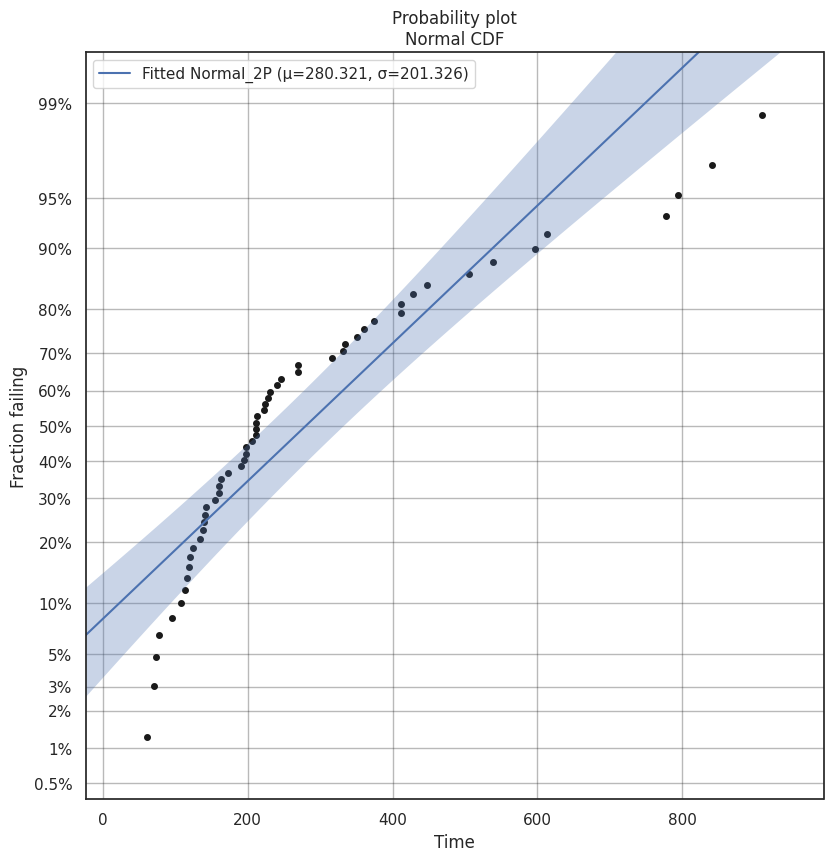

In [28]:
Normal_probability_plot(failures = THT["THT "].to_list()) # generates the probability plot with the data
plt.legend()
plt.show()
# Probability plot shows that normal is not the best fit for the data

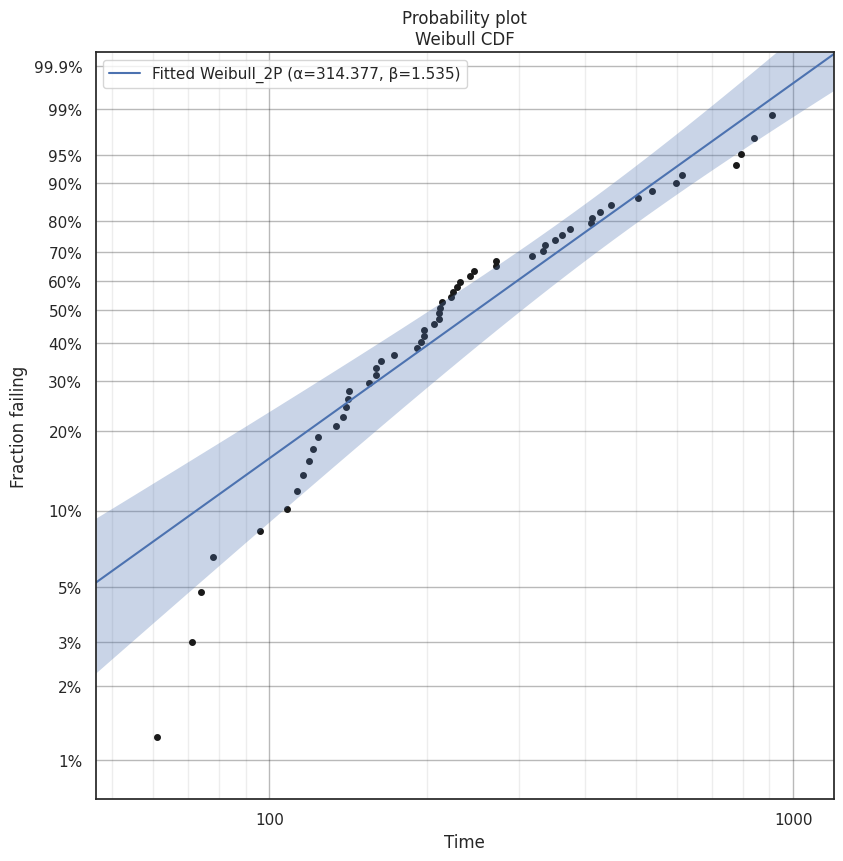

In [29]:
Weibull_probability_plot(failures = THT["THT "].to_list())
plt.legend()
plt.show()

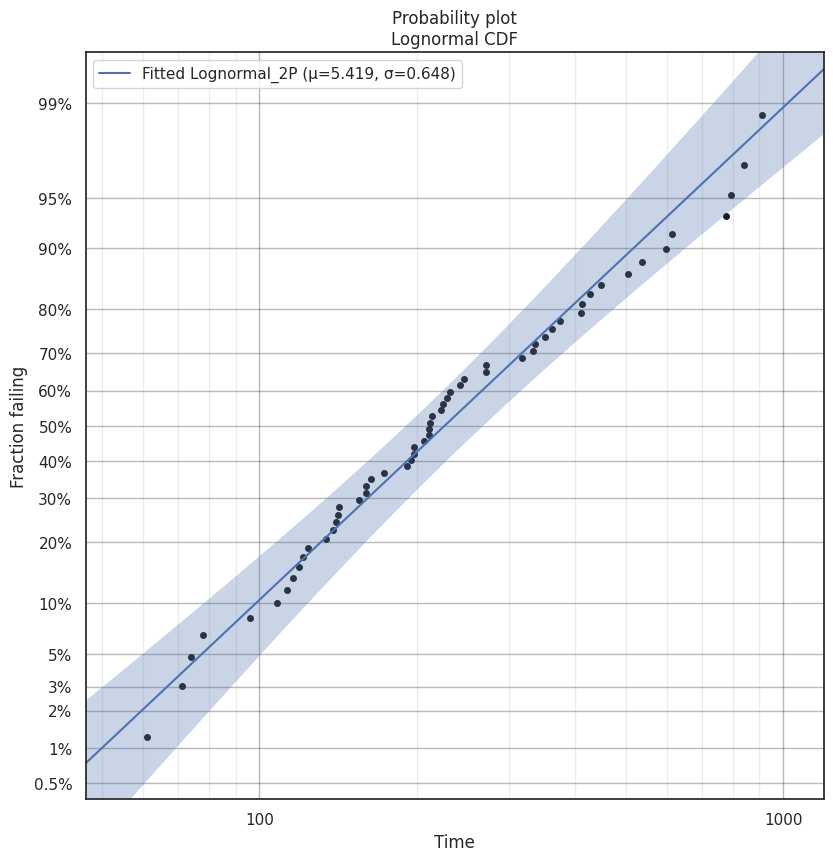

In [30]:
Lognormal_probability_plot(failures = THT["THT "].to_list())
plt.legend()
plt.show()

# M3-V5: Empirical CDF

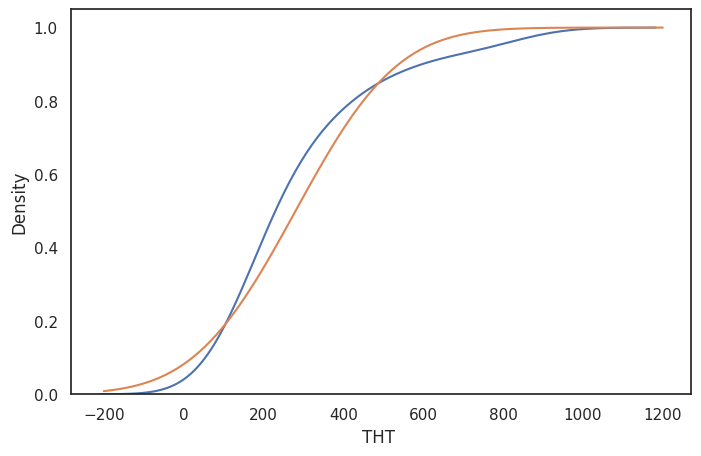

In [31]:
paramsN = [np.mean(THT["THT "]), np.std(THT["THT "])]
f, axcdf = plt.subplots(1,1, figsize = (8,5))
gkde = sns.kdeplot(THT["THT "], cumulative=True, ax = axcdf)
x = np.linspace(-200,1200, 100)
gcdf = axcdf.plot(x,ss.norm.cdf(x, loc = paramsN[0], scale = paramsN[1]))

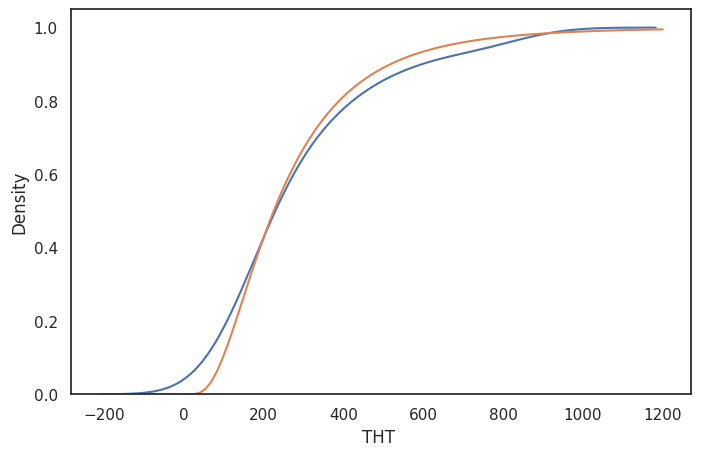

In [32]:
paramsL = ss.lognorm.fit(THT["THT "], floc = 0)
f, axcdf = plt.subplots(1,1, figsize = (8,5))
sns.kdeplot(THT["THT "], cumulative=True, ax = axcdf)
x = np.linspace(-200,1200, 100)
axcdf.plot(x, ss.lognorm.cdf(x, s= paramsL[0], loc = 0, scale = paramsL[2]))
plt.show()



#M3-V7: Exercise - Length of Stay



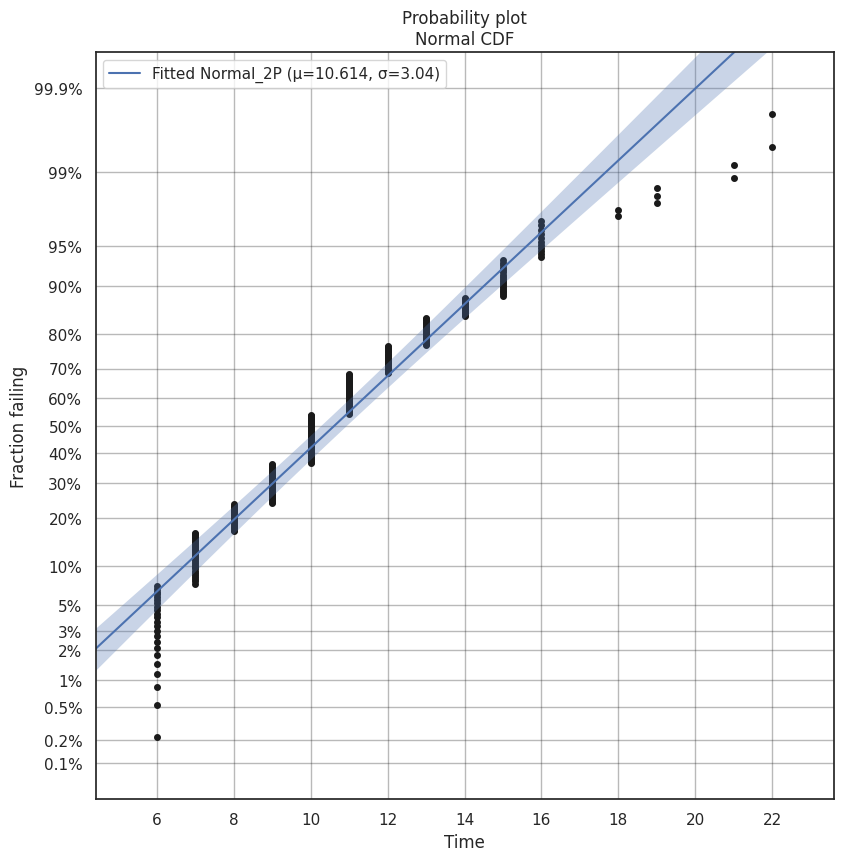

In [33]:
Normal_probability_plot(failures = LofS["Length of stay "].to_list()) #generates the probability plot
plt.legend()
plt.show()


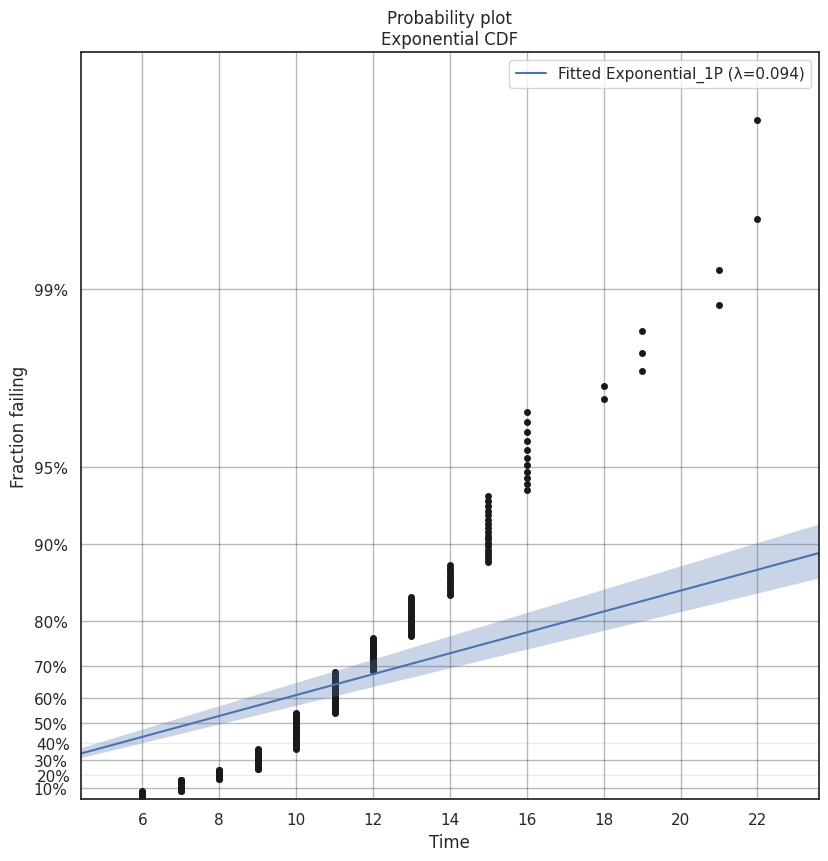

In [34]:
Exponential_probability_plot(failures = LofS["Length of stay "].to_list())
plt.legend()
plt.show()

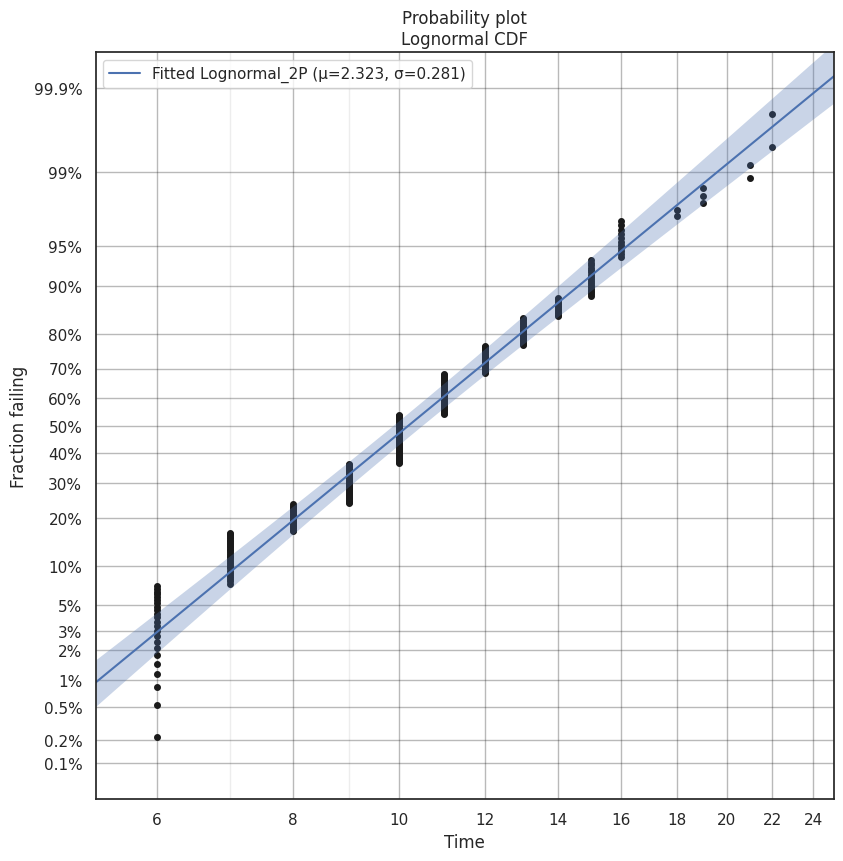

In [35]:
Lognormal_probability_plot(failures = LofS["Length of stay "].to_list())
plt.legend()
plt.show()

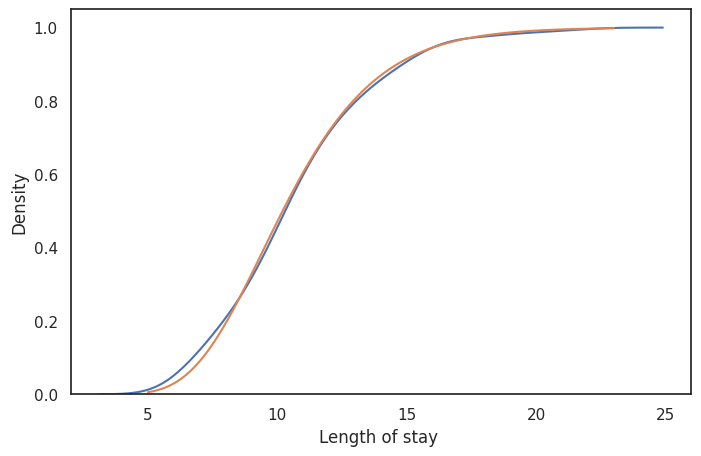

In [119]:
paramsL = ss.lognorm.fit(LofS["Length of stay "], floc = 0)
f, axcdf = plt.subplots(1,1, figsize = (8,5))
sns.kdeplot(LofS["Length of stay "], cumulative=True, ax = axcdf)
x = np.linspace(5, 23, 100)
axcdf.plot(x, ss.lognorm.cdf(x, s= paramsL[0], loc = 0, scale = paramsL[2]))
plt.show()

##M5 - V2: ANOVA analysis

In [37]:
Moist

,Machine 1,Machine 2,Machine 3,Machine 4
0,11.37,9.43,11.27,8.8
1,11.31,9.62,8.47,9.58
2,10.93,6.61,11.86,12.26
3,13.77,9.31,8.77,10
4,14.45,14.08,8.44,8.84
5,11.8,9.56,10.63,9.49
6,12.3,10.99,13.67,10.18
7,9.45,7.05,13.02,8.77
8,12.28,11.02,12.9,10.07
9,11.47,8.88,11.72,9.3


In [38]:
Moist_list = [Moist[mach] for mach in Moist.columns]
sh = [ss.shapiro(m) for m in Moist_list]
for s in sh: print(s.pvalue)
## For Machine 4 pvalue seems to reject the  null hypothesis, but the ANOVA analysis is carried anyways out in the course.

0.6514101624488831
0.3992699086666107
0.23218634724617004
0.024757809937000275


In [39]:
Medians = Moist.quantile(0.5)
print(Medians)

Machine 1   11.635
Machine 2    9.495
Machine 3   11.495
Machine 4    9.535
Name: 0.5, dtype: float64


In [40]:
from statsmodels.stats.oneway import anova_oneway #Scipy's ANOVA with function f_oneway always assumes equal variances.
from statsmodels.stats.anova import anova_lm

In [41]:
output = anova_oneway(Moist_list) # Unequal variances are assumed by default
print(output)

statistic = 5.597933344694495
pvalue = 0.006228007735138183
df = (3.0, 19.2604199006441)
df_num = 3.0
df_denom = 19.2604199006441
nobs_t = 40.0
n_groups = 4
means = [11.913  9.655 11.075  9.729]
nobs = [10. 10. 10. 10.]
vars_ = [2.00771222 4.45162778 3.79536111 1.07061   ]
use_var = unequal
welch_correction = True
tuple = (5.597933344694495, 0.006228007735138183)


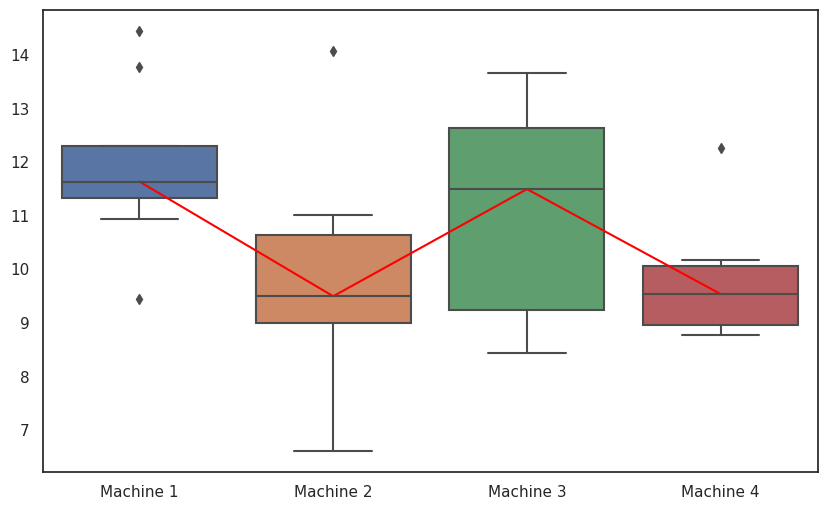

In [42]:
fig, ax = plt.subplots(1,1,figsize = (10, 6))
sns.boxplot(data = Moist, ax = ax)
ax.plot(Medians, '-', color = 'red')
plt.show()

In [43]:
## Alternative to Minitab's RSquared since neither Scipy nor Statsmodels provide a RSquared measure as shown in video.
lr = ss.linregress(x = [0, 1, 2, 3], y = Medians)
print("RSquared = {}".format(lr.rvalue**2))
## This method does not pretend to be the same Minitab does at the backend.

RSquared = 0.21943462058816576


## M5 - V3: ANOVA residual analysis


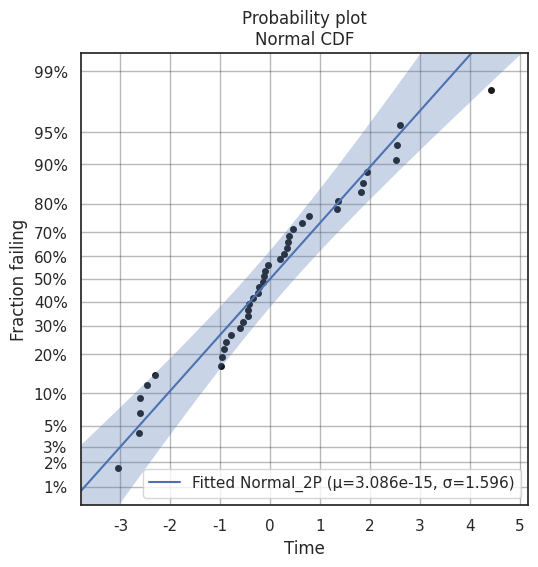

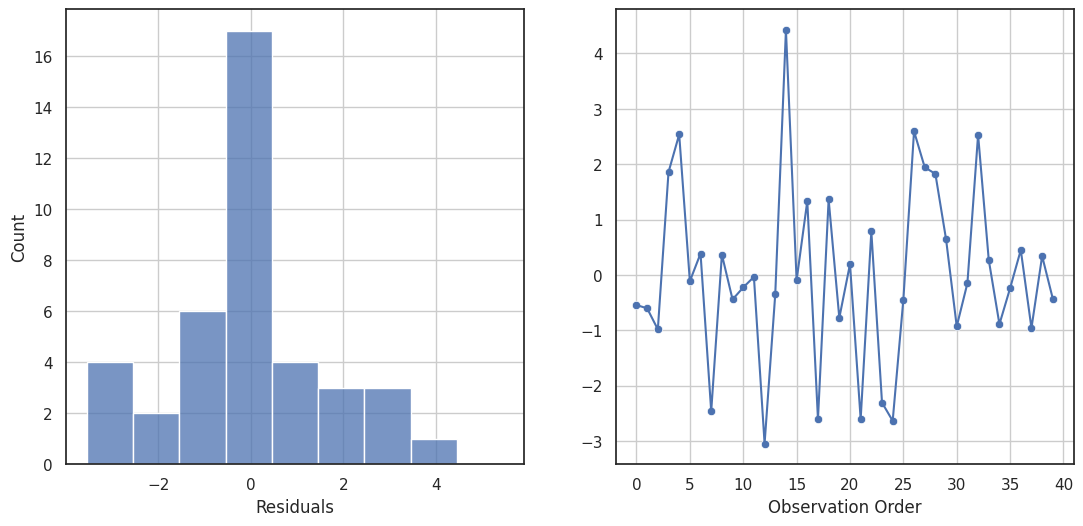

In [44]:
def anova_residuals_viz(df):

  """
  This function provides only the needed graphs to analyze residuals as donde in video M5 - V3.
  Input: Dataframe with all data used at previous boxplot

  """
  residuals = []
  for col in df.columns:
    aux = df.loc[:,col].dropna() - df.loc[:,col].dropna().mean()
    for au in aux:
      residuals.append(au)

  plt.subplot(221)
  Normal_probability_plot(failures = residuals)
  plt.gcf().set_size_inches(12, 12)
  plt.legend()
  plt.show()
  plt.subplot(223)
  h = sns.histplot(residuals, bins = 10, discrete = True)
  plt.xlabel("Residuals")
  h.grid(True)
  plt.subplot(224)
  h = sns.lineplot(residuals)
  h = sns.scatterplot(residuals)
  plt.xlabel("Observation Order")
  h.grid(True)
  plt.gcf().set_size_inches(13, 13)

anova_residuals_viz(Moist)

## M5 - V4: Kruskal-Wallis test

In [45]:
# Calculation of Medians
Medians = {"NO": THT.loc[THT["Training"] == "No","THT "].median(), "YES": THT.loc[THT["Training"] == "Yes","THT "].median()}
print("Medians = {}".format(Medians))
#Kruskal-Wallis
KW = ss.kruskal(THT.loc[THT["Training"] == "No","THT "], THT.loc[THT["Training"] == "Yes","THT "])
print(KW)

Medians = {'NO': 246.0, 'YES': 191.0}
KruskalResult(statistic=10.124978840319288, pvalue=0.0014627333789109824)


## M5 - V5: Two sample t-test

In [46]:
Fertilizers.head()

,Fertilizer A,Fertilizer B
0,7.8,10.9
1,5.1,4.3
2,5.7,9.1
3,2.3,5.2
4,2.9,6.2


In [47]:
ss.ttest_ind(Fertilizers["Fertilizer A"], Fertilizers["Fertilizer B"])

Ttest_indResult(statistic=-2.707054108458026, pvalue=0.014433730873512355)

##M5 - V6: Test for equality of variances

In [48]:
Moist.describe()

,Machine 1,Machine 2,Machine 3,Machine 4
count,10,10,10,10
mean,11.913,9.655,11.075,9.729
std,1.41694,2.10989,1.94817,1.0347
min,9.45,6.61,8.44,8.77
25%,11.325,8.9875,9.235,8.955
50%,11.635,9.495,11.495,9.535
75%,12.295,10.6475,12.64,10.0525
max,14.45,14.08,13.67,12.26


In [49]:
ss.levene(*Moist_list)

LeveneResult(statistic=1.1953333816795477, pvalue=0.3253302258207216)

## M5 - V7: Exercise - Productivity

In [50]:
Prod_list = [Productivity[shift] for shift in Productivity.columns]
sh = [ss.shapiro(m) for m in Prod_list]
for s in sh: print(s.pvalue)

0.3277588188648224
0.14411866664886475
2.1375714709392923e-07


In [51]:
output = anova_oneway(Prod_list) # Unequal variances are assumed by default
print(output)

statistic = 0.21746574076770855
pvalue = 0.8052708019902536
df = (2.0, 52.90141741003598)
df_num = 2.0
df_denom = 52.90141741003598
nobs_t = 90.0
n_groups = 3
means = [318.8        319.16666667 323.66666667]
nobs = [30. 30. 30.]
vars_ = [ 168.51034483  264.90229885 1450.02298851]
use_var = unequal
welch_correction = True
tuple = (0.21746574076770855, 0.8052708019902536)


In [52]:
Medians = Productivity.quantile(0.5)
print(Medians)

Shift 1     315
Shift 2   323.5
Shift 3     335
Name: 0.5, dtype: float64


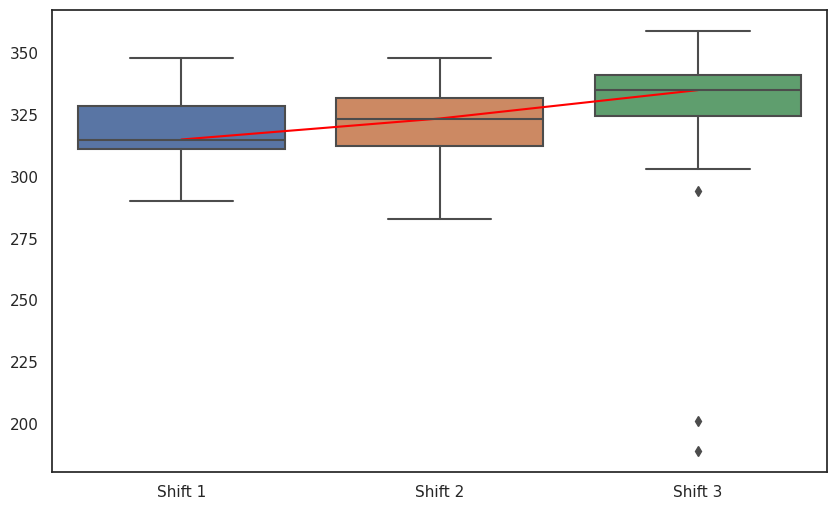

In [53]:
fig, ax = plt.subplots(1,1,figsize = (10, 6))
sns.boxplot(data = Productivity, ax = ax)
ax.plot(Medians, '-', color = 'red')
plt.show()

In [54]:
lr = ss.linregress(x = [0, 1, 2], y = Medians)
print("RSquared = {}".format(lr.rvalue**2))

RSquared = 0.9925558312655086


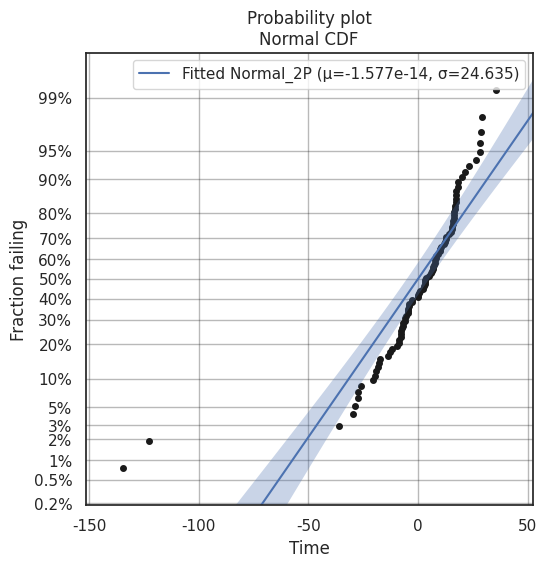

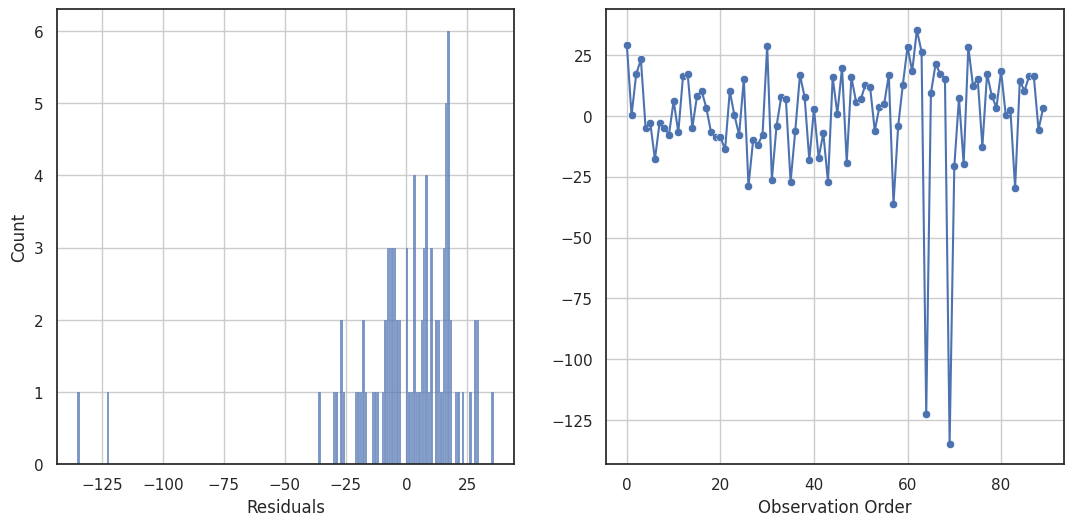

In [55]:
anova_residuals_viz(Productivity)

In [56]:
# ANOVA Assumptions not met. Try Kruskal-Wallis
ss.kruskal(*Prod_list)

KruskalResult(statistic=10.648326880303141, pvalue=0.004872425385206297)

## M5 - V8: Exercise - Department

In [57]:
Deps_names = ['A','B','C']
Deps_list = [Deps.loc[Deps["Department"] == d,'Throughput times'].to_list() for d in Deps_names]

In [58]:
sh = [ss.shapiro(Deps_list[k]) for k,d in enumerate(Deps_names)]
for s in sh: print(s.pvalue)

1.1589697257452514e-10
0.0012459639692679048
2.367206451850166e-18


In [59]:
output = anova_oneway(Deps_list) # Unequal variances are assumed by default
print(output)

statistic = 16.198399893416084
pvalue = 3.07785973164196e-07
df = (2.0, 196.508152877157)
df_num = 2.0
df_denom = 196.508152877157
nobs_t = 328.0
n_groups = 3
means = [16.90119266 10.93322222 20.36271318]
nobs = [109.  90. 129.]
vars_ = [249.62385319  43.67247152 409.47369805]
use_var = unequal
welch_correction = True
tuple = (16.198399893416084, 3.07785973164196e-07)


In [60]:
Medians = [np.median(Dep) for Dep in Deps_list]
print(Medians)

[11.52, 9.895, 15.47]


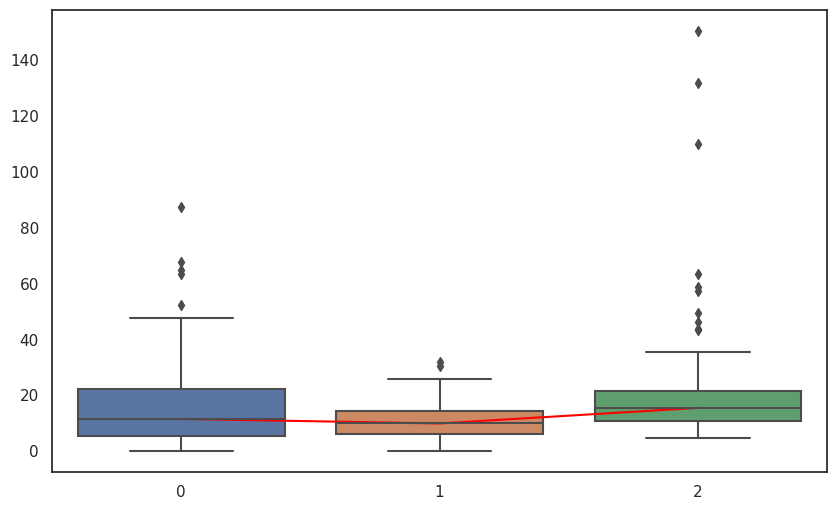

In [61]:
fig, ax = plt.subplots(1,1,figsize = (10, 6))
sns.boxplot(data = Deps_list, ax = ax)
ax.plot(Medians, '-', color = 'red')
plt.show()

In [62]:
lr = ss.linregress(x = [0, 1, 2], y = Medians)
print("RSquared = {}".format(lr.rvalue**2))

RSquared = 0.4744925112141718


In [63]:
Deps_dict = {d: pd.Series(Dep) for d,Dep in zip(Deps_names,Deps_list)}
Deps_df = pd.DataFrame(data = Deps_dict, columns = Deps_names)

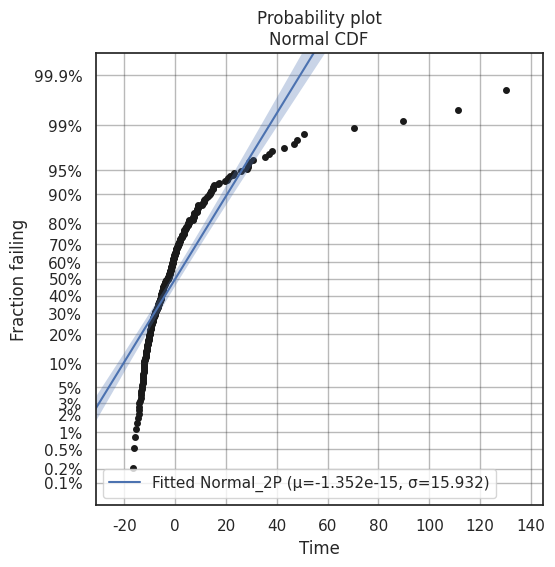

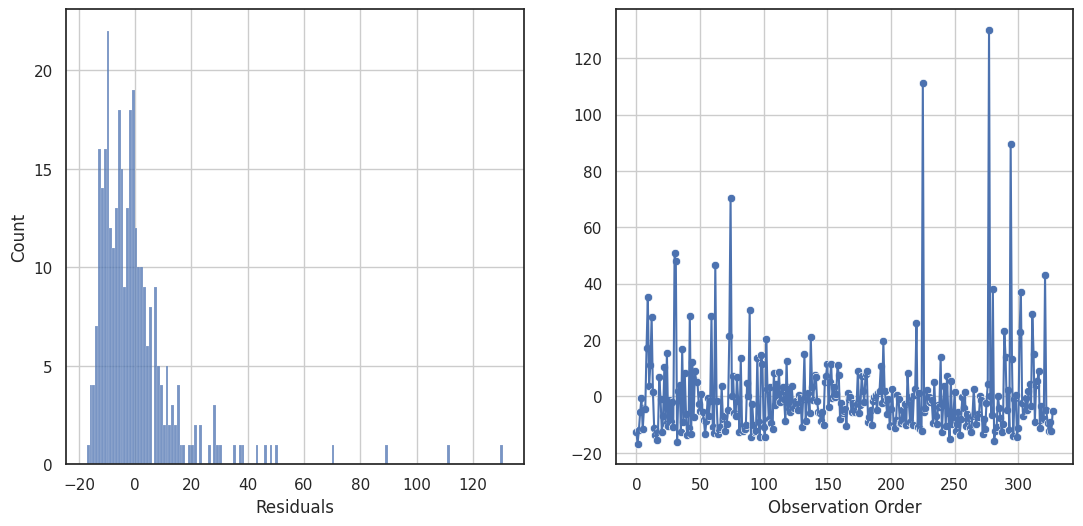

In [64]:
anova_residuals_viz(Deps_df)

In [65]:
# ANOVA Assumptions not met. Try Kruskal-Wallis
ss.kruskal(*Deps_list)

KruskalResult(statistic=30.220698472785777, pvalue=2.7394205352955823e-07)

## M6 - V3: Regression analysis

In [66]:
def regression_residual_viz(x, y, a = 0, b = 0, c = 0, graphs = True):

  """
  This function provides three in one graphs:
  Upper: Probability plot for residuals.
  Lower Left: Histogram for residual
  Lower rigth: Observation order Graph
  x: Independent Variable
  y: Dependent Variable
  a: Quadratic coefficient (just needed when regression is quadratic)
  b: Regression's slope - coefficient b*x
  c: Intercept coefficient
  graphs: Set to False if only residuals are wanted and graphs are not needed.
  returns:
  S: residuals standard deviation
  residuals: list of residuals
  """

  if a == 0:
    residuals = y - (b*x + c)
  else:
    residuals = y - (a*x**2 + b*x + c)

  residuals = residuals.to_list()

  S = np.std(residuals)
  if graphs == True:
    plt.subplot(221)
    Normal_probability_plot(failures = residuals)
    plt.gcf().set_size_inches(12, 12)
    plt.legend()
    plt.show()
    plt.subplot(223)
    h = sns.histplot(residuals, bins = 10)
    plt.xlabel("Residuals")
    h.grid(True)
    plt.subplot(224)
    h = sns.lineplot(residuals)
    h = sns.scatterplot(residuals)
    plt.xlabel("Observation Order")
    h.grid(True)
    plt.gcf().set_size_inches(13, 13)
  return [S, residuals]

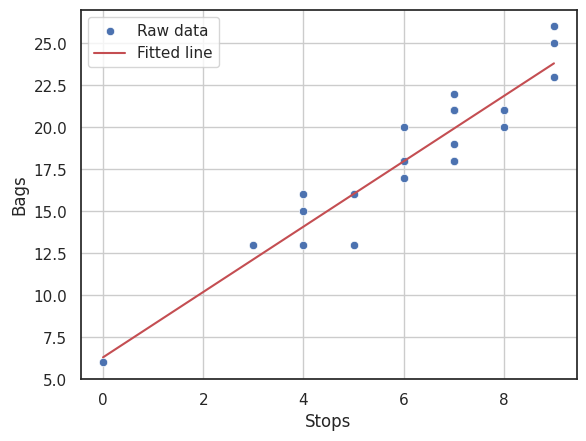

Slope = 1.9442307692307685
Intercept = 6.305769230769235
pvalue = 1.6595386453167944e-12
Rsquared = 0.8899028013818845


In [67]:

x = Tea["Stops"]
y = Tea["Bags"]

def scat_and_reg(x, y, pred_int = False, quad = False):

  """
  This function provides a scatterplot with the fitted regression in the same graph.
  x: Independent Variable
  y: Dependent Variable
  pred_int: Set to TRUE if prediction intervals are wanted.
  quad: Set to TRUE if a quadratic regression is wanted.
  returns: Regression's coefficients
  """

  def poly(x, a, b, c):
    return a*x**2 + b*x + c


  if quad == False:
    reg = ss.linregress(x, y)
    b = reg.slope
    c = reg.intercept
    a = 0
    rsq = reg.rvalue**2
    [S, residuals] = regression_residual_viz(x, y, a = a, b = b, c = c, graphs = False)

  else:
    popt, pcov = curve_fit(poly, x, y)
    [a,b,c] = popt
    [S, residuals] = regression_residual_viz(x, y, a = a, b = b, c = c, graphs = False)
    res2 = np.sum(np.array(residuals)**2)
    tss = np.sum((y - np.mean(y))**2)
    rsq = 1 - (res2/tss)

  gsc = sns.scatterplot(x = x, y = y, label = "Raw data")
  xx = np.linspace(min(x),max(x),20)
  plt.plot(xx, poly(xx,a,b,c), 'r', label='Fitted line')
  if pred_int == True:
    plt.plot(xx, poly(xx,a,b,c) + 2*S, 'g--', lw = 1)
    plt.plot(xx, poly(xx,a,b,c) - 2*S, 'g--', lw = 1)
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Slope = {}".format(b))
  print("Intercept = {}".format(c))
  if a!=0:
    print("Quad_coeff = {}".format(a))
  if a==0:
    print("pvalue = {}".format(reg.pvalue))
  else:
    print("Analize p-value with Statsmodels")

  print("Rsquared = {}".format(rsq))


  return [a,b,c]

[a,b,c] = scat_and_reg(x,y)

##M6 - V4: Regression residual analysis

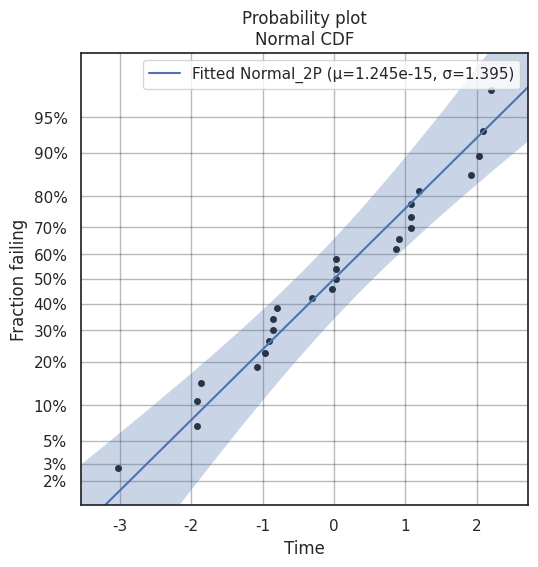

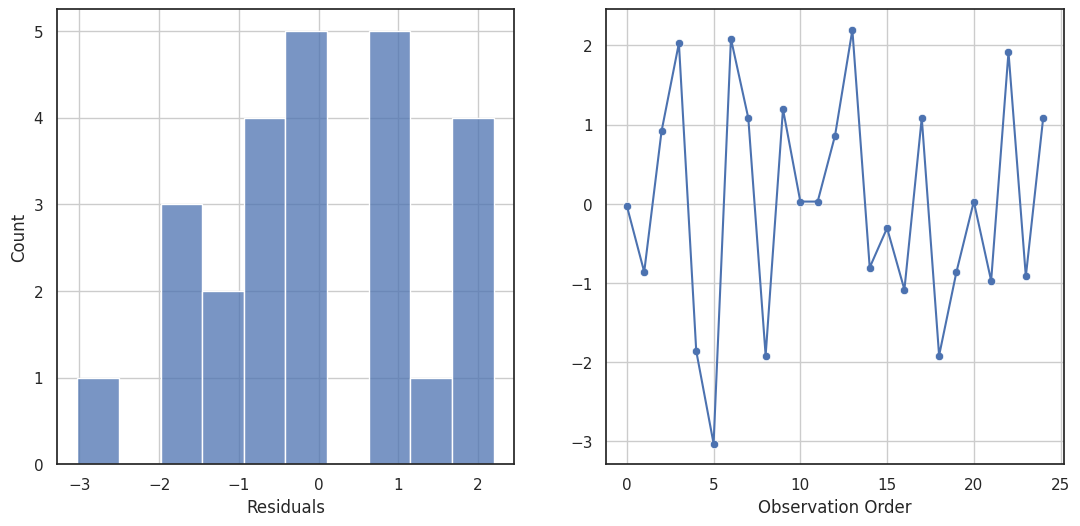

In [68]:
[S,_] = regression_residual_viz(x, y, b = b, c = c)

##M6-V5 Regression prediction interval

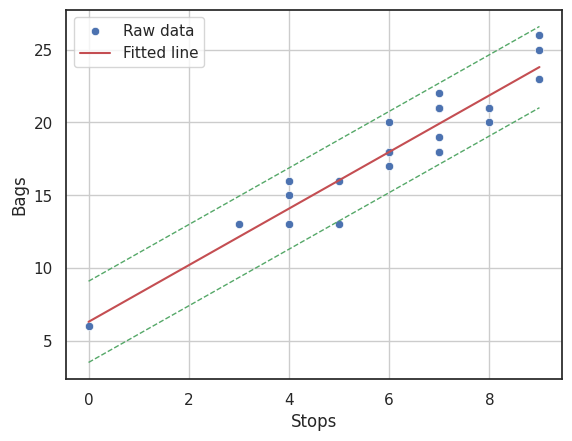

Slope = 1.9442307692307685
Intercept = 6.305769230769235
pvalue = 1.6595386453167944e-12
Rsquared = 0.8899028013818845


In [69]:
[a, b, c] = scat_and_reg(x,y, pred_int = True)

## M6 - V6: Quadratic Regression

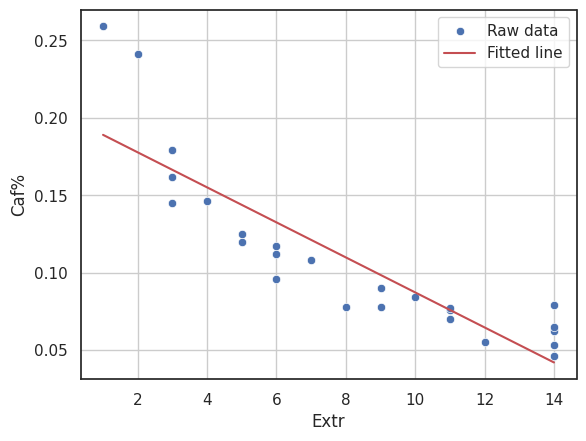

Slope = -0.01130882892804699
Intercept = 0.20029533773861968
pvalue = 9.115530703210777e-09
Rsquared = 0.7685455056255143


In [70]:
x = CaffQuad["Extr"]
y = CaffQuad["Caf%"]
[a, b, c] = scat_and_reg(x,y)

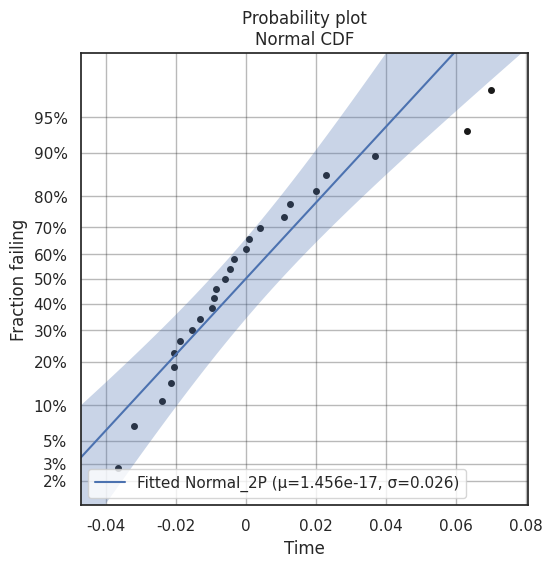

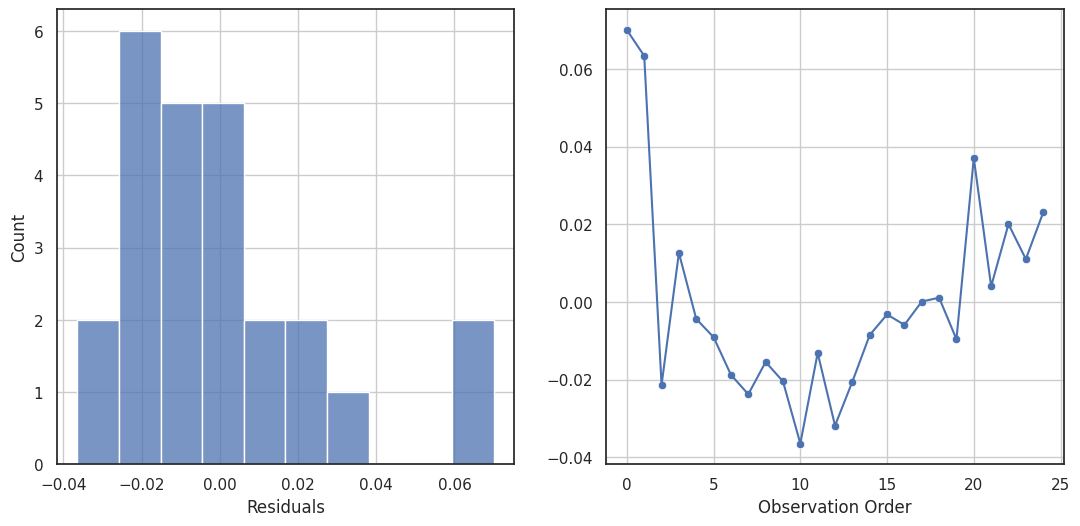

In [71]:
[S, _] = regression_residual_viz(x, y, b = b, c = c)

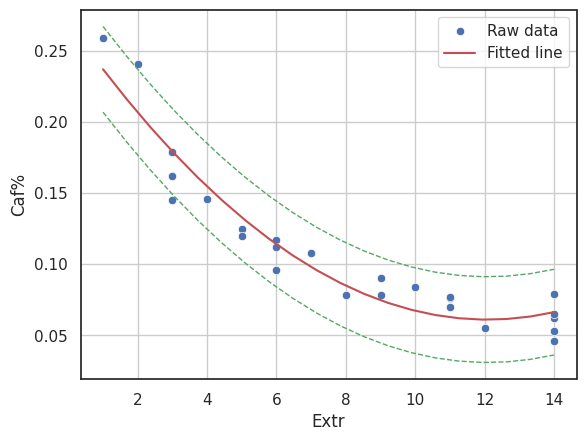

Slope = -0.03465906477249476
Intercept = 0.2703389380353871
Quad_coeff = 0.0014340704222240148
Analize p-value with Statsmodels
Rsquared = 0.9215947496552581


In [72]:
[a, b, c] = scat_and_reg(x,y, quad = True, pred_int = True)

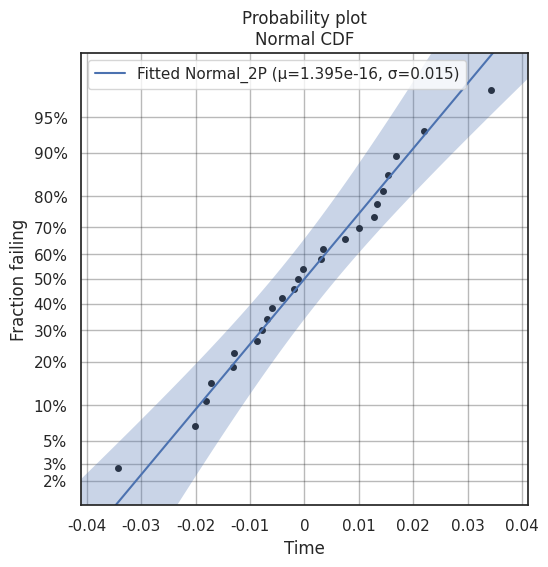

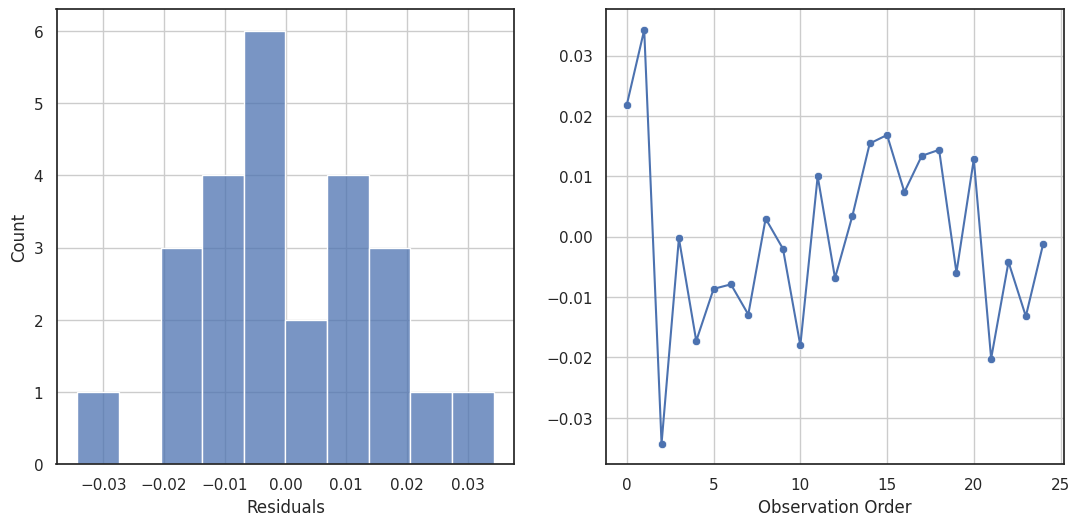

In [73]:
[S, _] = regression_residual_viz(x, y, a = a, b = b, c = c)

In [74]:
## To get p-values in quadratic regressions
import statsmodels.formula.api as sm
data = {'x': x, 'y': y}
model = sm.ols(formula = 'y ~ x + I(x**2)', data = data).fit()

In [75]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     129.3
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           6.88e-13
Time:                        16:18:57   Log-Likelihood:                 69.383
No. Observations:                  25   AIC:                            -132.8
Df Residuals:                      22   BIC:                            -129.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2703      0.013     21.155      0.0

##M6-V7 Exercise - picking

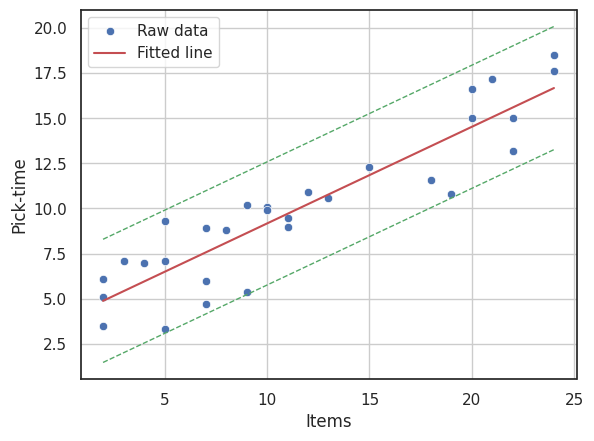

Slope = 0.5358273413325616
Intercept = 3.812263751920039
pvalue = 2.4730415011180253e-12
Rsquared = 0.8312474033016182


In [76]:
x = Picking["Items"]
y = Picking["Pick-time"]

[a, b, c] = scat_and_reg(x,y, pred_int = True)


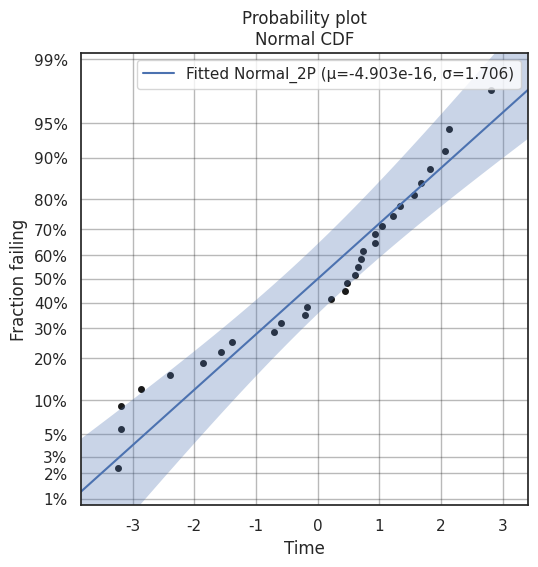

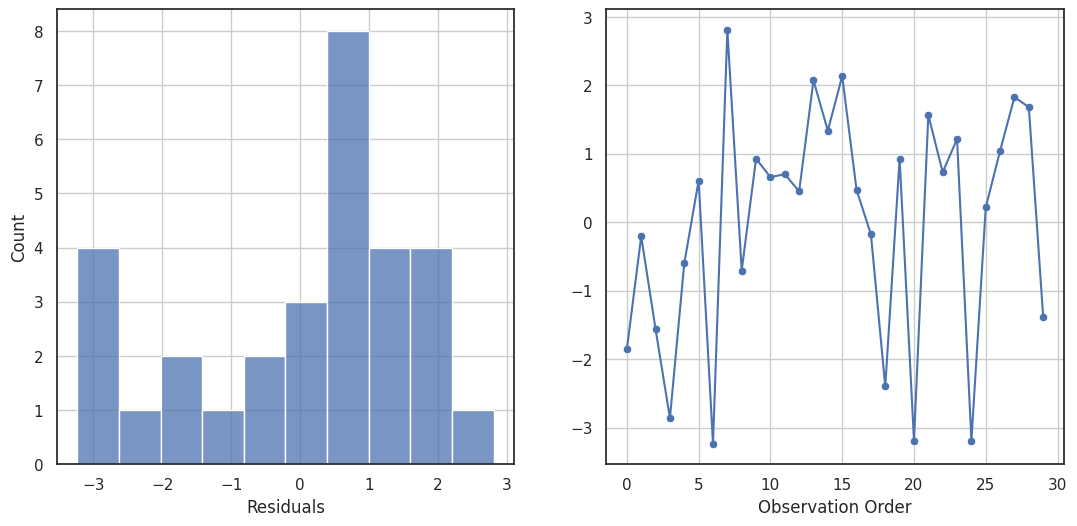

In [77]:
[S, _] = regression_residual_viz(x, y, b = b, c = c)

## M7-V1 Chi-square analysis

In [78]:
# Cross Tabulation
freqs = pd.crosstab(index = Hospital.Department, columns = Hospital.Specialist)

In [79]:
freqs

Specialist,P,Q,R
Department,,,
A1,81,52,78
A4,17,15,26


In [80]:
print(ss.chi2_contingency(freqs.to_numpy()))

Chi2ContingencyResult(statistic=1.783377222900243, pvalue=0.4099628998904614, dof=2, expected_freq=array([[76.86988848, 52.55390335, 81.57620818],
       [21.13011152, 14.44609665, 22.42379182]]))


## M7-V2 Logistic regression

In [81]:
Callcenter

,HoldTime.1,HungUp.1
0,16,0
1,10,0
2,19,1
3,12,0
4,19,1
...,...,...
331,6,0
332,17,1
333,8,1
334,2,0


In [114]:
# Instead of displaying total of calls and those who hung up, this table show how many people did not hang up (Col 0) and how many did ( Col 1)
# as show in Minitab's session window
CC_cross = pd.crosstab(columns = Callcenter["HungUp.1"], index = Callcenter["HoldTime.1"])
CC_cross = CC_cross.reset_index()
CC_cross

HungUp.1,HoldTime.1,0,1
0,1,18,1
1,2,15,0
2,3,10,2
3,4,14,1
4,5,9,5
5,6,11,2
6,7,9,8
7,8,11,10
8,9,9,9
9,10,10,3


In [115]:
# Probabilities of hanging up are calculated and inserted in the table.
# This is an event/trial-like table
Probs = CC_cross[1] / (CC_cross[0]  +  CC_cross[1])
CC_cross.insert(len(CC_cross.columns), "Probs", Probs)
CC_cross

HungUp.1,HoldTime.1,0,1,Probs
0,1,18,1,0.0526316
1,2,15,0,0
2,3,10,2,0.166667
3,4,14,1,0.0666667
4,5,9,5,0.357143
5,6,11,2,0.153846
6,7,9,8,0.470588
7,8,11,10,0.47619
8,9,9,9,0.5
9,10,10,3,0.230769


In [85]:
def logistic_reg(x, y):

  """
  Logistic Regression function with scipy.optimize.curve_fit
  x: Independent Variable
  y: Dependent Variable
  """

  def func(x, b, c):
    return np.exp(-(b*x + c))/(1 + np.exp(-(b*x + c)))

  popt, pcov = curve_fit(func, x, y)

  gsc = sns.scatterplot(x = x, y = y, label = "Raw data")
  xx = np.linspace(min(x),max(x),20)
  plt.plot(xx, func(xx,*popt), 'r', label='Fitted line')
  #plt.legend()
  plt.grid(True)
  plt.show()

  """
  PENDING: P-VALUE CALCULATION, SINCE scipy.optimize.curve_fit DOES NOT PROVIDE IT
  """

  return popt

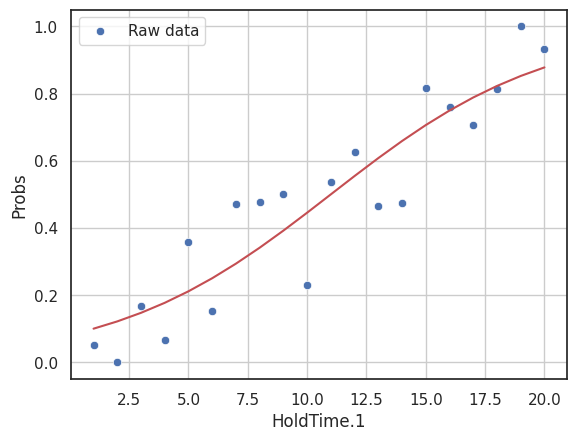

In [88]:
x = CC_cross["HoldTime.1"]
y = CC_cross["Probs"]
[b,c] = logistic_reg(x, y)
# Pending: p-value calculations

## M7-V3 Exercise - printers

In [92]:
Printers

,Good,Dubious,Bad
Printer,,,
AX-4,10,13,17
AX-2,19,15,6


In [94]:
print(ss.chi2_contingency(Printers.to_numpy()))

Chi2ContingencyResult(statistic=8.196830156350396, pvalue=0.016598962622793284, dof=2, expected_freq=array([[14.5, 14. , 11.5],
       [14.5, 14. , 11.5]]))


## M7-V4 Exercise - students


In [96]:
Student.head()

,Math grade,Pass?
Student,,
1,7,No
2,7,Yes
3,*,No
4,8,No
5,8,Yes


In [102]:
# Build an event/trial-like table
st_cross = pd.crosstab(columns = Student["Pass?"], index = Student["Math grade"])
st_cross = st_cross.reset_index()
Probs = st_cross["Yes"] / (st_cross["Yes"] + st_cross["No"])
st_cross.insert(len(st_cross.columns), "Probs", Probs)

In [103]:
st_cross

Pass?,Math grade,No,Yes,Probs
0,5,1,0,0
1,6,4,0,0
2,7,4,1,0.2
3,8,3,3,0.5
4,9,2,4,0.666667
5,10,0,3,1
6,*,5,0,0


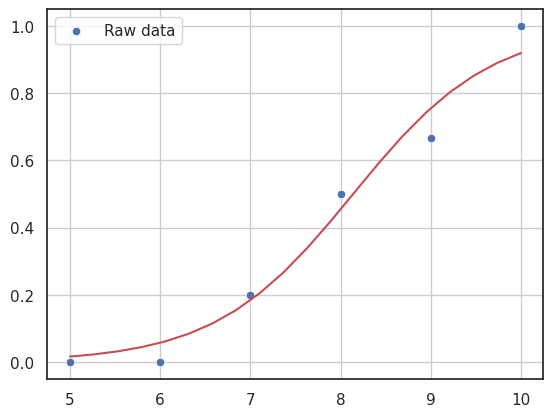

In [113]:
x = st_cross["Math grade"].drop(6).to_numpy()
y = st_cross["Probs"].drop(6).to_numpy()
[b,c] = logistic_reg(x, y)
# Pending: p-value calculations